# Project Akhir Pengenalan Pola <br> Kelas C

## Detail Project:

**Anggota:**
1. Abdiel Wahyu R. (175150201111033)  
2. Adji Pangestu W. (175150207111010)
3. Raihan Hanif F. (175150201111018)
4. Muh. Ghalib (175150200111031)
5. Yohanna Fransiska A. (175150201111027)


**Dataset yang digunakan:** 1000 Cameras Dataset <br>
**Sumber:** https://www.kaggle.com/crawford/1000-cameras-dataset/ <br>
**Metode yang digunakan:** K-Means

# Latar Belakang
1000 Cameras Dataset adalah dataset untuk mendeskripsikan 10000 kamera berdasarkan 13 properties (fitur). Kami menggunakan dataset ini karena ingin membandingkan pengaruh spesifikasi kamera yang satu dengan spesifikasi kamera yang lainnya, sehingga kami dapat memasukkannya ke dalam pengelompokan yang sama berdasarkan spesifikasi-spesifikasi tersebut.

# Metode Penyelesaian
Berdasarkan masalah diatas, kami berkeinginan untuk membuat pengelompokan kamera yang sederhana.
Kami menggunakan dataset dari sebuah website bernama kaggle.

Berdasarkan dataset tersebut, **terdapat 13 fitur yang dapat digunakan**. Yaitu :

1. Model : Model dari kamera
2. Release date : Tahun rilis dari kamera
3. Max resolution : Resolusi maksimal dari kamera
4. Low resolution : Resolusi minimal dari kamera
5. Effective pixels : Ukuran pixel yang efektif dari kemera
6. Zoom wide (W) : Ukuran lebar zoom dari lensa kamera
7. Zoom tele (T) : Ukuran kejelasan objek dari zoom lensa kamera
8. Normal focus range : Jarak normal fokus dari kamera
9. Macro focus range : Ukuran kejelasan objek makro dari kamera ketika di zoom
10. Storage included : Memori penyimpanan dari kamera
11. Weight (inc. batteries) : Berat dari bodi kamera tersebut dan baterainya
12. Dimensions : Dimensi dari kamera
13. Price : Harga dari kamera

**Kami ingin membandingkan pengelompokan (clustering) antara 12 fitur pada dataset dan 4 fitur pada dataset.**

12 fitur tersebut adalah :
1. Release date
2. Max resolution
3. Low resolution
4. Effective pixels
5. Zoom wide (W)
6. Zoom tele (T)
7. Normal focus range
8. Macro focus range
9. Storage included
10. Weight (inc batteries)
11. Dimensions
12. Price

(kami tidak menggunakan 'Model' karena isi datanya berupa huruf, bukan angka).

Sedangkan 4 fitur untuk perbandingannya adalah fitur yang dipilih secara random. Kami memilih 4 fitur secara random karena tujuan kami adalah ingin melihat perbandingan apa yang akan terjadi jika melakukan pengelompokan antara 12 fitur dan 4 fitur.

# Hypotesis
K-Means merupakan salah satu metode pengelompokan data non hirarki yang digunakan untuk mempartisi N objek data ke dalam K kelompok. Metode K-Means ini dapat mengelompokkan jumlah K (K adalah jumlah kluster) terhadap grouping klusterisasi sesuai dengan konteks yang ada.

Dalam konteks ini, seperti yang telah dijelaskan diatas bahwa kami ingin membandingkan klusterisasi antara 12 fitur dan 4 fitur dengan menggunakan metode K-Means.

# Import Dataset

In [112]:
#ganti ke path local pc masing-masing
localFilePath = 'F:\camera_dataset.csv'

In [113]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import sys

# Clustering berdasarkan 12 Fitur

## Inisialisasi Data

In [114]:
#load dataframe to notebook
DatasetAsli = pd.read_csv(filepath_or_buffer=localFilePath,sep=',')
DataFrame = pd.DataFrame(DatasetAsli)
#DataFrame = DataFrame.fillna(0) #Fill data yang berupa NaN dengan 0
DataFrame = DataFrame.dropna()
for features in DataFrame: #drop semua data yang nilainya 0.0 kecuali storage karena nilai storage 0 masuk akal
    if(features == "Storage included"):
        continue
    DataFrame = DataFrame[DataFrame[features] != 0.0]
DataFrame = DataFrame.reset_index(drop=True) #reset index setelah diremove
DataFrame = DataFrame.drop(columns="Model") #drop nama model biar gak diiolah
featureList = DataFrame.columns
DataFrame["Cluster"] = "" #tambah tag cluster untuk tiap row data
df=DataFrame
# df = DataFrame.iloc[:,:4]

# featureList = df.columns
# df["Cluster"] = ""

jumlahData = DataFrame.shape[0]
print("Jumlah data keseluruhan\t:",jumlahData)

jumlahFeatures = featureList.size #cluster tidak dihitung sebagai fitur
#print(DataFrame)
print("Jumlah features\t\t:",jumlahFeatures)

Jumlah data keseluruhan	: 805
Jumlah features		: 12


In [115]:
print("\033[1m","\t\t\t\tData","\033[0m\n",df)

 				Data 
      Release date  Max resolution  Low resolution  Effective pixels  \
0            2001          1600.0           640.0               1.0   
1            2001          1280.0          1024.0               1.0   
2            2002          1280.0          1024.0               1.0   
3            2001          1600.0          1024.0               1.0   
4            2002          1600.0          1024.0               1.0   
..            ...             ...             ...               ...   
800          2001          2048.0          1024.0               3.0   
801          2000          2048.0          1024.0               3.0   
802          2001          2048.0          1024.0               3.0   
803          2001          2400.0          1200.0               3.0   
804          2002          1600.0           800.0               1.0   

     Zoom wide (W)  Zoom tele (T)  Normal focus range  Macro focus range  \
0             51.0           51.0                50.0      

##### Tentukan jumlah cluster, threshold, dan F lama

In [116]:
jumlahCluster = 3
Threshold = 5000
Flama = 0

##### Randomkan cluster untuk tiap data

## Iterasi #1
Iterasi ini dilakukan untuk pengelompokan fitur-fitur ke dalam kelompok kluster yang telah ditetapkan (yaitu sebanyak 12 kelompok).

##### Cluster awal

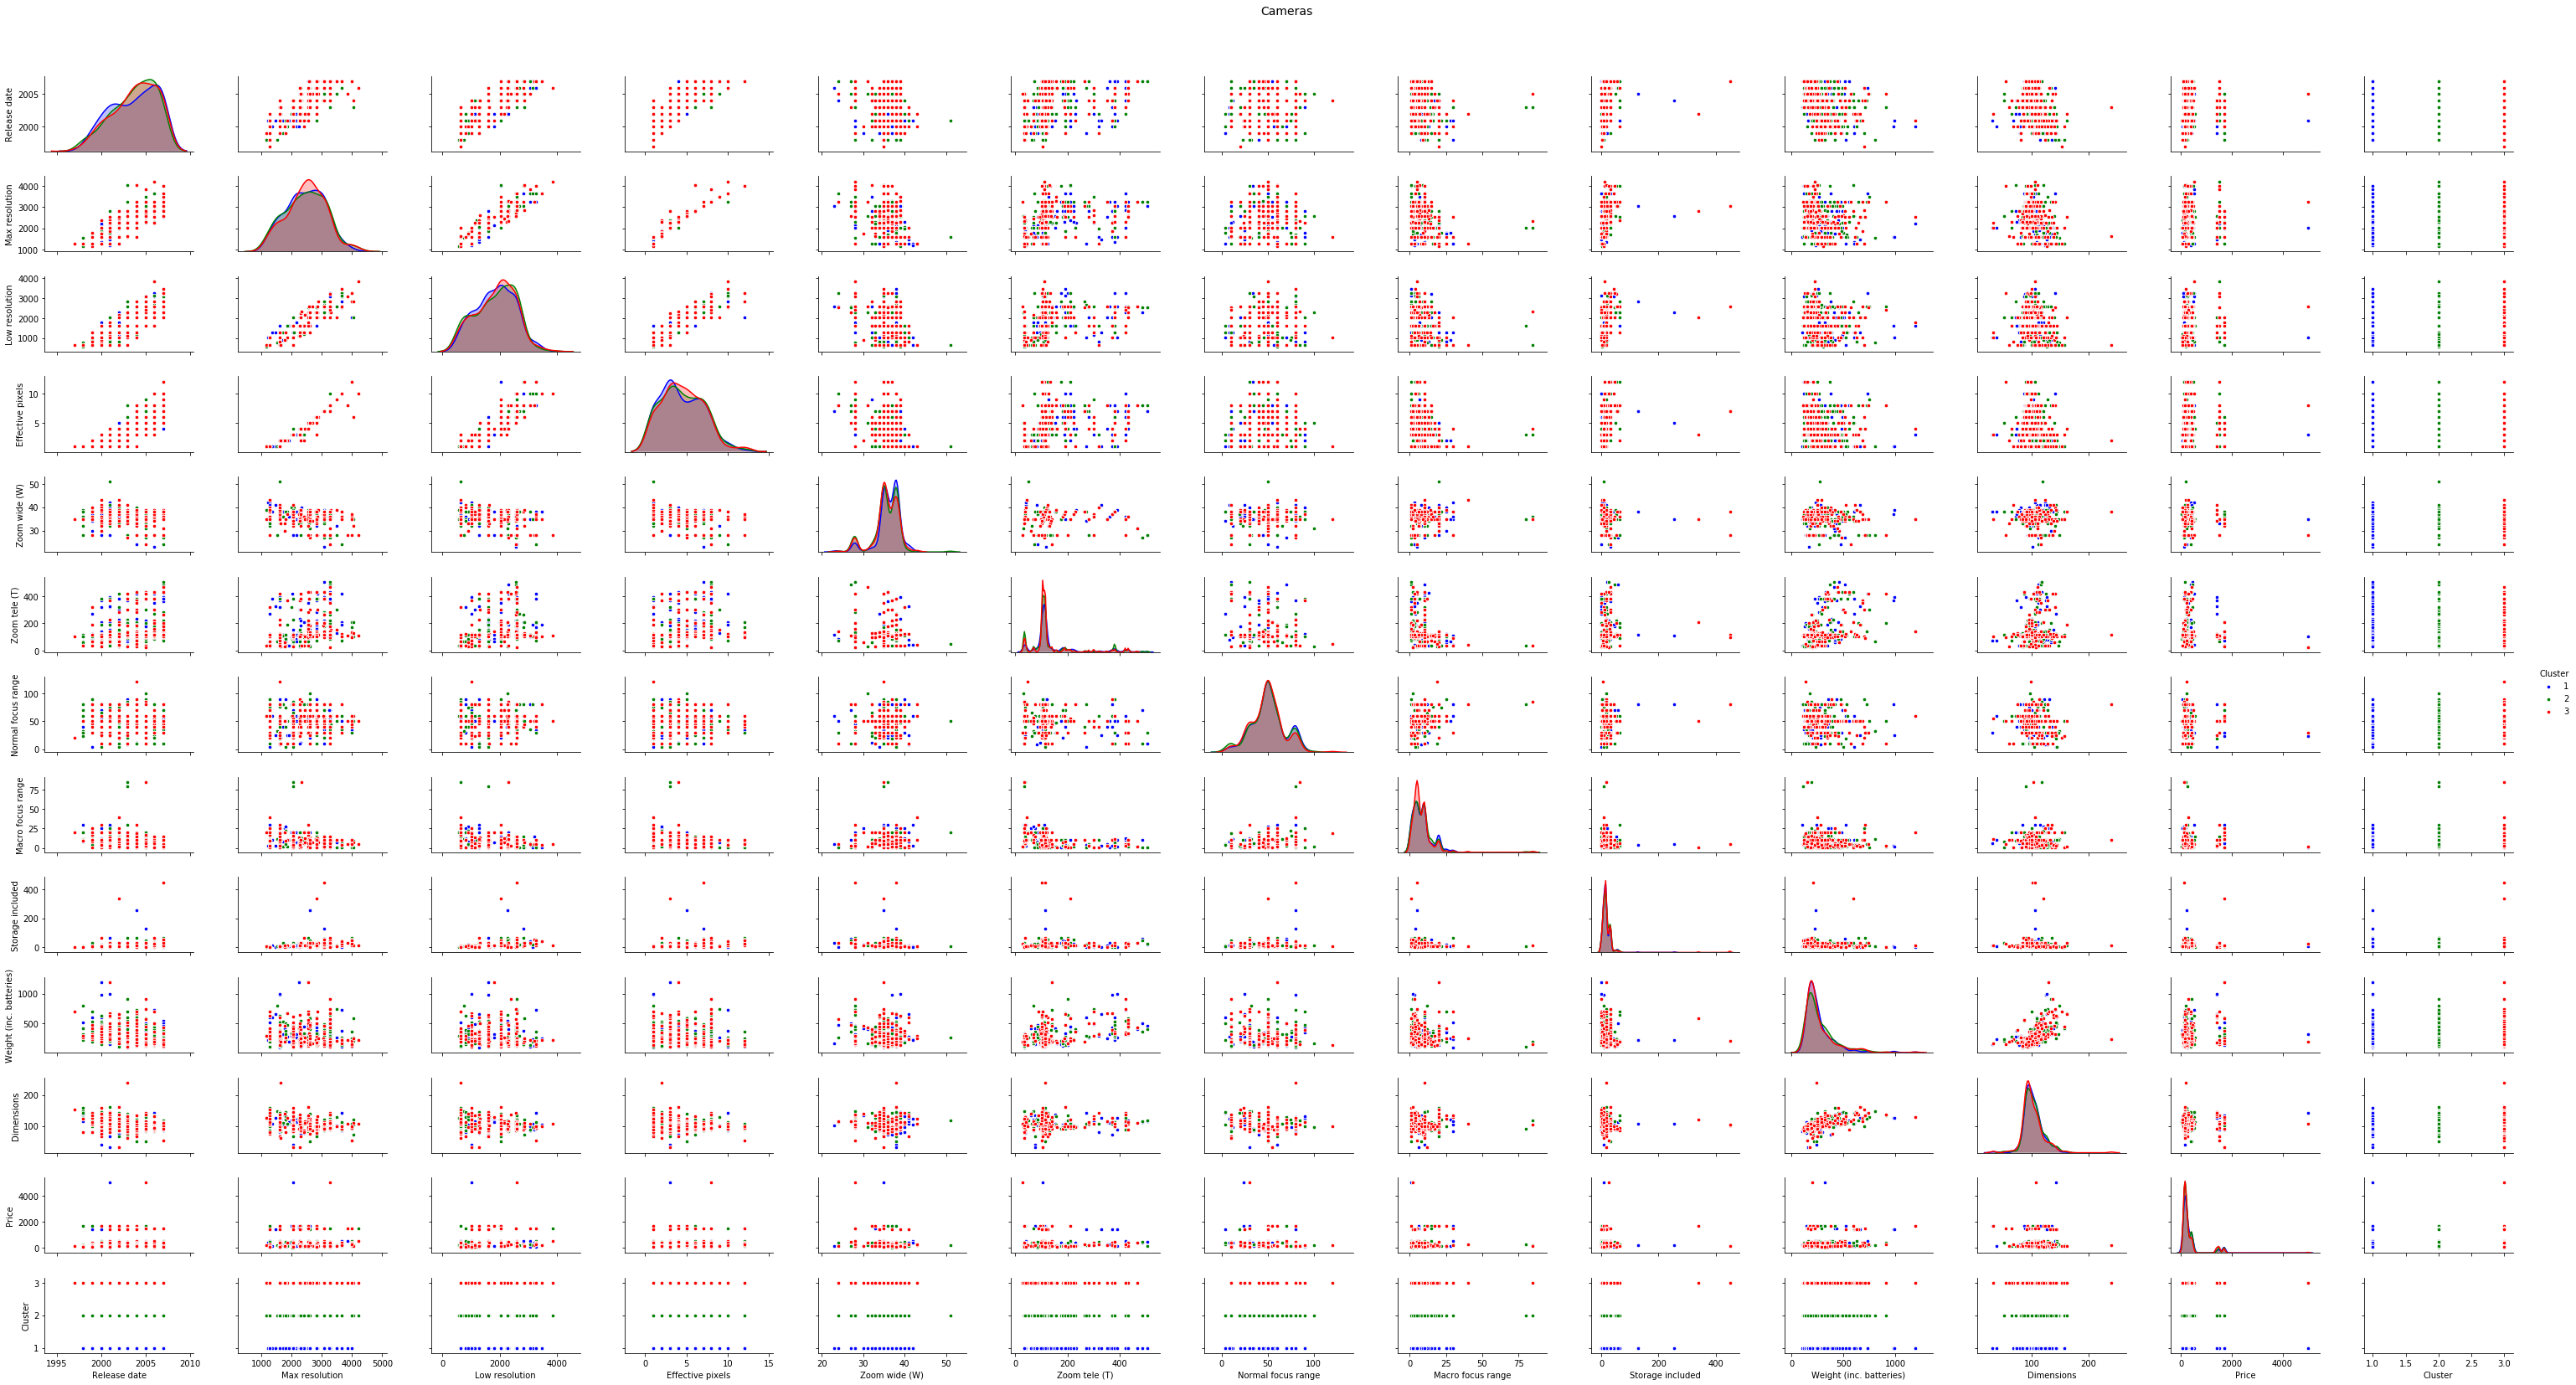

In [118]:
pp = sns.pairplot(df, size=1.8, aspect=1.8, hue="Cluster", palette=["b","g","r"],
                  plot_kws=dict(s=20),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Cameras', fontsize=14)

In [119]:
print(df)
print(df.iloc[0:1,-1:].values[0]) #== cluster

     Release date  Max resolution  Low resolution  Effective pixels  \
0            2001          1600.0           640.0               1.0   
1            2001          1280.0          1024.0               1.0   
2            2002          1280.0          1024.0               1.0   
3            2001          1600.0          1024.0               1.0   
4            2002          1600.0          1024.0               1.0   
..            ...             ...             ...               ...   
800          2001          2048.0          1024.0               3.0   
801          2000          2048.0          1024.0               3.0   
802          2001          2048.0          1024.0               3.0   
803          2001          2400.0          1200.0               3.0   
804          2002          1600.0           800.0               1.0   

     Zoom wide (W)  Zoom tele (T)  Normal focus range  Macro focus range  \
0             51.0           51.0                50.0               20.

##### Pemisahan data berdasarkan cluster

In [120]:
dfCluster = {}
for cluster in range(jumlahCluster):
    dfCluster[cluster+1] = df.loc[df["Cluster"] == (cluster+1)]
    dfCluster[cluster+1] = dfCluster[cluster+1].drop(columns="Cluster")
print(dfCluster)

{1:      Release date  Max resolution  Low resolution  Effective pixels  \
2            2002          1280.0          1024.0               1.0   
11           2007          2592.0          2048.0               5.0   
13           2006          2592.0          2048.0               5.0   
15           2007          3072.0          2592.0               7.0   
16           2007          3072.0          2592.0               7.0   
..            ...             ...             ...               ...   
795          1999          1280.0           640.0               1.0   
797          1999          1600.0           800.0               1.0   
799          2001          1792.0           896.0               2.0   
801          2000          2048.0          1024.0               3.0   
802          2001          2048.0          1024.0               3.0   

     Zoom wide (W)  Zoom tele (T)  Normal focus range  Macro focus range  \
2             39.0           39.0                20.0              

##### Nilai centroid dan jarak tiap data ke centroidnya

In [121]:
centroid = {}
for feature in featureList:
    centroid[feature] = {}
    for cluster in range(jumlahCluster):
        centroid[feature][cluster+1] = 0

for feature in featureList:
    for cluster in range(jumlahCluster):
        centroid[feature][cluster+1] = np.mean(dfCluster[cluster+1].loc[:,feature])
        
print(pd.DataFrame.from_dict(centroid))#.transpose())
print(df.iloc[:,:-1])

   Release date  Max resolution  Low resolution  Effective pixels  \
1   2003.726316     2459.164912     1855.607018          4.463158   
2   2003.739464     2470.111111     1855.295019          4.574713   
3   2003.857143     2494.409266     1868.100386          4.610039   

   Zoom wide (W)  Zoom tele (T)  Normal focus range  Macro focus range  \
1      36.192982     144.357895           51.185965           8.582456   
2      35.501916     133.007663           50.383142           8.812261   
3      35.606178     130.389961           49.718147           8.262548   

   Storage included  Weight (inc. batteries)  Dimensions       Price  
1         18.287719               261.207018  102.215789  375.403509  
2         17.927203               269.701149  103.258621  333.501916  
3         21.822394               266.424710  101.527027  366.127413  
     Release date  Max resolution  Low resolution  Effective pixels  \
0            2001          1600.0           640.0               1.0   


In [122]:
#print(df[fiturX][datakeN]-centroidX)
#jarakData
#jarakData[ke-N][keCentroidFitur]
tempJumlahSemuaFitur = {}
for dataKeN in range(jumlahData):
    tempJumlahSemuaFitur[dataKeN] = {}
    for cluster in range(jumlahCluster):
        tempJumlahSemuaFitur[dataKeN][cluster+1] = 0
        for feature in featureList:
            #print("Data ke-",dataKeN,"\nCluster ke-",cluster+1,"\nFeature: ",feature)
            #print((df.iloc[dataKeN:dataKeN+1].loc[:,feature] - centroid[feature][cluster+1])**2)
            tempJumlahSemuaFitur[dataKeN][cluster+1] += ((df.iloc[dataKeN:dataKeN+1].loc[:,feature] - centroid[feature][cluster+1])**2)
        tempJumlahSemuaFitur[dataKeN][cluster+1] = np.sqrt(tempJumlahSemuaFitur[dataKeN][cluster+1]) 
print(tempJumlahSemuaFitur)

{0: {1: 0    1504.656142
Name: Release date, dtype: float64, 2: 0    1505.112502
Name: Release date, dtype: float64, 3: 0    1533.108961
Name: Release date, dtype: float64}, 1: {1: 1    1467.393153
Name: Release date, dtype: float64, 2: 1    1469.0104
Name: Release date, dtype: float64, 3: 1    1500.783279
Name: Release date, dtype: float64}, 2: {1: 2    1466.789916
Name: Release date, dtype: float64, 2: 2    1468.738302
Name: Release date, dtype: float64, 3: 2    1500.044994
Name: Release date, dtype: float64}, 3: {1: 3    1225.143714
Name: Release date, dtype: float64, 2: 3    1224.222384
Name: Release date, dtype: float64, 3: 3    1255.997022
Name: Release date, dtype: float64}, 4: {1: 4    1224.421134
Name: Release date, dtype: float64, 2: 4    1223.895865
Name: Release date, dtype: float64, 3: 4    1255.114757
Name: Release date, dtype: float64}, 5: {1: 5    1465.664888
Name: Release date, dtype: float64, 2: 5    1467.428749
Name: Release date, dtype: float64, 3: 5    1499.180433


In [123]:
print(tempJumlahSemuaFitur[0]) #DATA UDAH BENER JANGAN DIUBAH2 LAGI
#baca: JARAK DATA KE-0 KE SETIAP CENTROID CLUSTER (1,2,3)

print(tempJumlahSemuaFitur[0][1])

{1: 0    1504.656142
Name: Release date, dtype: float64, 2: 0    1505.112502
Name: Release date, dtype: float64, 3: 0    1533.108961
Name: Release date, dtype: float64}
0    1504.656142
Name: Release date, dtype: float64


##### Total jumlah jarak tiap cluster

In [124]:
sigmaC = {}
for cluster in range(jumlahCluster):
    sigmaC[cluster+1] = 0
    for data in range(jumlahData):
        sigmaC[cluster+1] += tempJumlahSemuaFitur[data][cluster+1].values[0]
        #print(tempJumlahSemuaFitur[data][cluster+1].values[0])
print(sigmaC)

Fbaru = 0
for sigma in sigmaC:
    Fbaru += sigmaC[sigma]
print(Fbaru)

{1: 738759.8515435591, 2: 734878.3707102956, 3: 736291.8353181455}
2209930.057572


##### Penghitungan delta dan pengecekan threshold

In [125]:
delta = abs(Fbaru-Flama)
print(delta,", sedangkan threshold adalah",Threshold)
if (delta > Threshold):
    print("Ulangi iterasi")
else:
    print("Stop! Sudah sesuai threshold")
Flama = Fbaru

2209930.057572 , sedangkan threshold adalah 5000
Ulangi iterasi


##### Memasukkan nilai cluster baru ke dataframe

In [126]:
#tempJumlahSemuaFitur[data][jarakKeCluster]
for data in range(jumlahData):
    for cluster in range(jumlahCluster):
        dataMin = min(tempJumlahSemuaFitur[data][1].values[0],tempJumlahSemuaFitur[data][2].values[0],tempJumlahSemuaFitur[data][3].values[0])
        if (tempJumlahSemuaFitur[data][cluster+1].values[0] == dataMin):
            newCluster = cluster+1
    df["Cluster"][data] = newCluster
print(newCluster)

2


C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


##### Cluster baru

In [127]:
print(df)

     Release date  Max resolution  Low resolution  Effective pixels  \
0            2001          1600.0           640.0               1.0   
1            2001          1280.0          1024.0               1.0   
2            2002          1280.0          1024.0               1.0   
3            2001          1600.0          1024.0               1.0   
4            2002          1600.0          1024.0               1.0   
..            ...             ...             ...               ...   
800          2001          2048.0          1024.0               3.0   
801          2000          2048.0          1024.0               3.0   
802          2001          2048.0          1024.0               3.0   
803          2001          2400.0          1200.0               3.0   
804          2002          1600.0           800.0               1.0   

     Zoom wide (W)  Zoom tele (T)  Normal focus range  Macro focus range  \
0             51.0           51.0                50.0               20.

## Iterasi #2
Iterasi akan terus berlanjut karena pada bagian "Penghitungan delta dan pengecekan threshold", hasil dari nilai delta yaitu 222209930.05757 lebih besar daripada nilai threshold yaitu 5000.

Cara iterasi 2 yang akan dilakukan adalah sama dengan cara yang sudah dilakukan pada iterasi 1 sehingga nantinya didapatkan nilai delta yang baru. Jika nilai delta baru masih lebih besar daripada nilai threshold, maka terus lakukan iterasi dampai nilai delta baru kurang dari nilai threshold. Namun apabila nilai delta baru sudah lebih kecil daripada nilai threshold, maka iterasi sudah bisa dihentikan.

##### Cluster awal

In [128]:
print(df)

     Release date  Max resolution  Low resolution  Effective pixels  \
0            2001          1600.0           640.0               1.0   
1            2001          1280.0          1024.0               1.0   
2            2002          1280.0          1024.0               1.0   
3            2001          1600.0          1024.0               1.0   
4            2002          1600.0          1024.0               1.0   
..            ...             ...             ...               ...   
800          2001          2048.0          1024.0               3.0   
801          2000          2048.0          1024.0               3.0   
802          2001          2048.0          1024.0               3.0   
803          2001          2400.0          1200.0               3.0   
804          2002          1600.0           800.0               1.0   

     Zoom wide (W)  Zoom tele (T)  Normal focus range  Macro focus range  \
0             51.0           51.0                50.0               20.

##### Pemisahan data berdasarkan cluster

In [129]:
dfCluster = {}
for cluster in range(jumlahCluster):
    dfCluster[cluster+1] = df.loc[df["Cluster"] == (cluster+1)]
    dfCluster[cluster+1] = dfCluster[cluster+1].drop(columns="Cluster")
print(dfCluster)

{1:      Release date  Max resolution  Low resolution  Effective pixels  \
0            2001          1600.0           640.0               1.0   
1            2001          1280.0          1024.0               1.0   
2            2002          1280.0          1024.0               1.0   
5            2002          1280.0          1024.0               1.0   
12           1999          1280.0           640.0               1.0   
..            ...             ...             ...               ...   
786          2001          1280.0          1024.0               1.0   
787          1999          1280.0          1024.0               1.0   
788          2001          1472.0          1280.0               1.0   
789          2001          1600.0          1024.0               1.0   
798          2000          1792.0           896.0               2.0   

     Zoom wide (W)  Zoom tele (T)  Normal focus range  Macro focus range  \
0             51.0           51.0                50.0              

##### Nilai centroid dan jarak tiap data ke centroid

In [130]:
centroid = {}
for feature in featureList:
    centroid[feature] = {}
    for cluster in range(jumlahCluster):
        centroid[feature][cluster+1] = 0

for feature in featureList:
    for cluster in range(jumlahCluster):
        centroid[feature][cluster+1] = np.mean(dfCluster[cluster+1].loc[:,feature])
        
print(pd.DataFrame.from_dict(centroid))#.transpose())
print(df.iloc[:,:-1])

   Release date  Max resolution  Low resolution  Effective pixels  \
1   2001.419048     1776.361905     1183.695238          2.038095   
2   2002.884615     2221.658120     1562.175214          3.358974   
3   2005.717452     3043.515235     2445.409972          6.775623   

   Zoom wide (W)  Zoom tele (T)  Normal focus range  Macro focus range  \
1      36.314286     113.800000           49.700000          11.228571   
2      35.871795     125.764957           51.598291           9.594017   
3      35.409972     155.958449           50.149584           6.324100   

   Storage included  Weight (inc. batteries)  Dimensions       Price  
1         10.980952               308.652381  108.728571  686.785714  
2         16.132479               273.893162  103.735043  162.145299  
3         26.210526               235.268698   97.702216  295.551247  
     Release date  Max resolution  Low resolution  Effective pixels  \
0            2001          1600.0           640.0               1.0   


In [131]:
#print(df[fiturX][datakeN]-centroidX)
#jarakData
#jarakData[ke-N][keCentroidFitur]
tempJumlahSemuaFitur = {}
for dataKeN in range(jumlahData):
    tempJumlahSemuaFitur[dataKeN] = {}
    for cluster in range(jumlahCluster):
        tempJumlahSemuaFitur[dataKeN][cluster+1] = 0
        for feature in featureList:
            #print("Data ke-",dataKeN,"\nCluster ke-",cluster+1,"\nFeature: ",feature)
            #print((df.iloc[dataKeN:dataKeN+1].loc[:,feature] - centroid[feature][cluster+1])**2)
            tempJumlahSemuaFitur[dataKeN][cluster+1] += ((df.iloc[dataKeN:dataKeN+1].loc[:,feature] - centroid[feature][cluster+1])**2)
        tempJumlahSemuaFitur[dataKeN][cluster+1] = np.sqrt(tempJumlahSemuaFitur[dataKeN][cluster+1]) 
print(tempJumlahSemuaFitur)

{0: {1: 0    768.375267
Name: Release date, dtype: float64, 2: 0    1115.079797
Name: Release date, dtype: float64, 3: 0    2317.394888
Name: Release date, dtype: float64}, 1: {1: 1    759.70671
Name: Release date, dtype: float64, 2: 1    1090.088895
Name: Release date, dtype: float64, 3: 1    2275.592823
Name: Release date, dtype: float64}, 2: {1: 2    765.166436
Name: Release date, dtype: float64, 2: 2    1089.930299
Name: Release date, dtype: float64, 3: 2    2273.793963
Name: Release date, dtype: float64}, 3: {1: 3    601.566842
Name: Release date, dtype: float64, 2: 3    829.477307
Name: Release date, dtype: float64, 3: 3    2037.663599
Name: Release date, dtype: float64}, 4: {1: 4    608.44725
Name: Release date, dtype: float64, 2: 4    829.26887
Name: Release date, dtype: float64, 3: 4    2035.654498
Name: Release date, dtype: float64}, 5: {1: 5    757.932758
Name: Release date, dtype: float64, 2: 5    1088.053624
Name: Release date, dtype: float64, 3: 5    2274.192757
Name: Rel

In [132]:
print(tempJumlahSemuaFitur[0]) #DATA UDAH BENER JANGAN DIUBAH2 LAGI
#baca: JARAK DATA KE-0 KE SETIAP CENTROID CLUSTER (1,2,3)

print(tempJumlahSemuaFitur[0][1])

{1: 0    768.375267
Name: Release date, dtype: float64, 2: 0    1115.079797
Name: Release date, dtype: float64, 3: 0    2317.394888
Name: Release date, dtype: float64}
0    768.375267
Name: Release date, dtype: float64


##### Total jumlah jarak tiap cluster

In [133]:
sigmaC = {}
for cluster in range(jumlahCluster):
    sigmaC[cluster+1] = 0
    for data in range(jumlahData):
        sigmaC[cluster+1] += tempJumlahSemuaFitur[data][cluster+1].values[0]
        #print(tempJumlahSemuaFitur[data][cluster+1].values[0])
print(sigmaC)

Fbaru = 0
for sigma in sigmaC:
    Fbaru += sigmaC[sigma]
print(Fbaru)

{1: 1070039.2967958667, 2: 797485.0923688577, 3: 887145.0321111422}
2754669.4212758667


##### Penghitungan delta dan pengecekan threshold

In [134]:
delta = abs(Fbaru-Flama)
print(delta,", sedangkan threshold adalah",Threshold)
if (delta > Threshold):
    print("Ulangi iterasi")
else:
    print("Stop! Sudah sesuai threshold")
Flama = Fbaru

544739.3637038665 , sedangkan threshold adalah 5000
Ulangi iterasi


##### Memasukkan nilai cluster baru ke dataframe

In [135]:
#tempJumlahSemuaFitur[data][jarakKeCluster]
for data in range(jumlahData):
    for cluster in range(jumlahCluster):
        dataMin = min(tempJumlahSemuaFitur[data][1].values[0],tempJumlahSemuaFitur[data][2].values[0],tempJumlahSemuaFitur[data][3].values[0])
        if (tempJumlahSemuaFitur[data][cluster+1].values[0] == dataMin):
            newCluster = cluster+1
    df["Cluster"][data] = newCluster
print(newCluster)

1


C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


##### Cluster baru

In [136]:
print(df)

     Release date  Max resolution  Low resolution  Effective pixels  \
0            2001          1600.0           640.0               1.0   
1            2001          1280.0          1024.0               1.0   
2            2002          1280.0          1024.0               1.0   
3            2001          1600.0          1024.0               1.0   
4            2002          1600.0          1024.0               1.0   
..            ...             ...             ...               ...   
800          2001          2048.0          1024.0               3.0   
801          2000          2048.0          1024.0               3.0   
802          2001          2048.0          1024.0               3.0   
803          2001          2400.0          1200.0               3.0   
804          2002          1600.0           800.0               1.0   

     Zoom wide (W)  Zoom tele (T)  Normal focus range  Macro focus range  \
0             51.0           51.0                50.0               20.

In [137]:
# pp = sns.pairplot(df, size=1.8, aspect=1.8, hue="Cluster", palette=["b","g","r"],
#                   plot_kws=dict(s=20),
#                   diag_kind="kde", diag_kws=dict(shade=True))

# fig = pp.fig 
# fig.subplots_adjust(top=0.93, wspace=0.3)
# t = fig.suptitle('Cameras', fontsize=14)

## Iterasi #3
Iterasi akan terus berlanjut karena pada bagian "Penghitungan delta dan pengecekan threshold", hasil dari nilai delta yaitu 544739.3637038665 lebih besar daripada nilai threshold yaitu 5000.

Cara iterasi 3 yang akan dilakukan adalah sama dengan cara yang sudah dilakukan pada iterasi 1 dan 2 sehingga nantinya didapatkan nilai delta yang baru. Jika nilai delta baru masih lebih besar daripada nilai threshold, maka terus lakukan iterasi dampai nilai delta baru kurang dari nilai threshold. Namun apabila nilai delta baru sudah lebih kecil daripada nilai threshold, maka iterasi sudah bisa dihentikan.

##### Cluster awal

In [138]:
print(df)

     Release date  Max resolution  Low resolution  Effective pixels  \
0            2001          1600.0           640.0               1.0   
1            2001          1280.0          1024.0               1.0   
2            2002          1280.0          1024.0               1.0   
3            2001          1600.0          1024.0               1.0   
4            2002          1600.0          1024.0               1.0   
..            ...             ...             ...               ...   
800          2001          2048.0          1024.0               3.0   
801          2000          2048.0          1024.0               3.0   
802          2001          2048.0          1024.0               3.0   
803          2001          2400.0          1200.0               3.0   
804          2002          1600.0           800.0               1.0   

     Zoom wide (W)  Zoom tele (T)  Normal focus range  Macro focus range  \
0             51.0           51.0                50.0               20.

##### Pemisahan data berdasarkan cluster

In [139]:
dfCluster = {}
for cluster in range(jumlahCluster):
    dfCluster[cluster+1] = df.loc[df["Cluster"] == (cluster+1)]
    dfCluster[cluster+1] = dfCluster[cluster+1].drop(columns="Cluster")
print(dfCluster)

{1:      Release date  Max resolution  Low resolution  Effective pixels  \
0            2001          1600.0           640.0               1.0   
1            2001          1280.0          1024.0               1.0   
2            2002          1280.0          1024.0               1.0   
3            2001          1600.0          1024.0               1.0   
4            2002          1600.0          1024.0               1.0   
..            ...             ...             ...               ...   
796          1999          1600.0           800.0               1.0   
797          1999          1600.0           800.0               1.0   
798          2000          1792.0           896.0               2.0   
799          2001          1792.0           896.0               2.0   
804          2002          1600.0           800.0               1.0   

     Zoom wide (W)  Zoom tele (T)  Normal focus range  Macro focus range  \
0             51.0           51.0                50.0              

##### Nilai centroid dan jarak tiap data ke centroid

In [140]:
centroid = {}
for feature in featureList:
    centroid[feature] = {}
    for cluster in range(jumlahCluster):
        centroid[feature][cluster+1] = 0

for feature in featureList:
    for cluster in range(jumlahCluster):
        centroid[feature][cluster+1] = np.mean(dfCluster[cluster+1].loc[:,feature])
        
print(pd.DataFrame.from_dict(centroid))#.transpose())
print(df.iloc[:,:-1])

   Release date  Max resolution  Low resolution  Effective pixels  \
1   2000.800000     1660.625000      996.680000          1.650000   
2   2003.242553     2286.072340     1677.055319          3.557447   
3   2005.716216     3033.137838     2441.821622          6.740541   

   Zoom wide (W)  Zoom tele (T)  Normal focus range  Macro focus range  \
1      36.310000     101.475000           52.190000          12.480000   
2      35.919149     135.340426           49.225532           8.246809   
3      35.405405     155.481081           50.294595           6.627027   

   Storage included  Weight (inc. batteries)  Dimensions       Price  
1          9.865000               328.355000  111.512500  602.265000  
2         16.731915               258.195745  101.563830  213.046809  
3         26.048649               236.467568   97.858108  319.843243  
     Release date  Max resolution  Low resolution  Effective pixels  \
0            2001          1600.0           640.0               1.0   


In [141]:
#print(df[fiturX][datakeN]-centroidX)
#jarakData
#jarakData[ke-N][keCentroidFitur]
tempJumlahSemuaFitur = {}
for dataKeN in range(jumlahData):
    tempJumlahSemuaFitur[dataKeN] = {}
    for cluster in range(jumlahCluster):
        tempJumlahSemuaFitur[dataKeN][cluster+1] = 0
        for feature in featureList:
            #print("Data ke-",dataKeN,"\nCluster ke-",cluster+1,"\nFeature: ",feature)
            #print((df.iloc[dataKeN:dataKeN+1].loc[:,feature] - centroid[feature][cluster+1])**2)
            tempJumlahSemuaFitur[dataKeN][cluster+1] += ((df.iloc[dataKeN:dataKeN+1].loc[:,feature] - centroid[feature][cluster+1])**2)
        tempJumlahSemuaFitur[dataKeN][cluster+1] = np.sqrt(tempJumlahSemuaFitur[dataKeN][cluster+1]) 
print(tempJumlahSemuaFitur)

{0: {1: 0    562.44062
Name: Release date, dtype: float64, 2: 0    1247.136251
Name: Release date, dtype: float64, 3: 0    2309.452923
Name: Release date, dtype: float64}, 1: {1: 1    602.504494
Name: Release date, dtype: float64, 2: 1    1208.158236
Name: Release date, dtype: float64, 3: 1    2267.031416
Name: Release date, dtype: float64}, 2: {1: 2    613.130187
Name: Release date, dtype: float64, 2: 2    1206.46543
Name: Release date, dtype: float64, 3: 2    2265.296301
Name: Release date, dtype: float64}, 3: {1: 3    470.968859
Name: Release date, dtype: float64, 2: 3    958.206672
Name: Release date, dtype: float64, 3: 3    2029.734768
Name: Release date, dtype: float64}, 4: {1: 4    484.488004
Name: Release date, dtype: float64, 2: 4    956.071407
Name: Release date, dtype: float64, 3: 4    2027.796615
Name: Release date, dtype: float64}, 5: {1: 5    601.087195
Name: Release date, dtype: float64, 2: 5    1205.996528
Name: Release date, dtype: float64, 3: 5    2265.639289
Name: Re

In [142]:
print(tempJumlahSemuaFitur[0]) #DATA UDAH BENER JANGAN DIUBAH2 LAGI
#baca: JARAK DATA KE-0 KE SETIAP CENTROID CLUSTER (1,2,3)

print(tempJumlahSemuaFitur[0][1])

{1: 0    562.44062
Name: Release date, dtype: float64, 2: 0    1247.136251
Name: Release date, dtype: float64, 3: 0    2309.452923
Name: Release date, dtype: float64}
0    562.44062
Name: Release date, dtype: float64


##### Total jumlah jarak tiap cluster

In [143]:
sigmaC = {}
for cluster in range(jumlahCluster):
    sigmaC[cluster+1] = 0
    for data in range(jumlahData):
        sigmaC[cluster+1] += tempJumlahSemuaFitur[data][cluster+1].values[0]
        #print(tempJumlahSemuaFitur[data][cluster+1].values[0])
print(sigmaC)

Fbaru = 0
for sigma in sigmaC:
    Fbaru += sigmaC[sigma]
print(Fbaru)

{1: 1158920.9958106838, 2: 764597.9891617682, 3: 884090.7077256136}
2807609.6926980657


##### Penghitungan delta dan pengecekan threshold

In [144]:
delta = abs(Fbaru-Flama)
print(delta,", sedangkan threshold adalah",Threshold)
if (delta > Threshold):
    print("Ulangi iterasi")
else:
    print("Stop! Sudah sesuai threshold")
Flama = Fbaru

52940.27142219897 , sedangkan threshold adalah 5000
Ulangi iterasi


##### Memasukkan nilai cluster baru ke dataframe

In [145]:
#tempJumlahSemuaFitur[data][jarakKeCluster]
for data in range(jumlahData):
    for cluster in range(jumlahCluster):
        dataMin = min(tempJumlahSemuaFitur[data][1].values[0],tempJumlahSemuaFitur[data][2].values[0],tempJumlahSemuaFitur[data][3].values[0])
        if (tempJumlahSemuaFitur[data][cluster+1].values[0] == dataMin):
            newCluster = cluster+1
    df["Cluster"][data] = newCluster
print(newCluster)

1


C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


##### Cluster baru

In [146]:
print(df)

     Release date  Max resolution  Low resolution  Effective pixels  \
0            2001          1600.0           640.0               1.0   
1            2001          1280.0          1024.0               1.0   
2            2002          1280.0          1024.0               1.0   
3            2001          1600.0          1024.0               1.0   
4            2002          1600.0          1024.0               1.0   
..            ...             ...             ...               ...   
800          2001          2048.0          1024.0               3.0   
801          2000          2048.0          1024.0               3.0   
802          2001          2048.0          1024.0               3.0   
803          2001          2400.0          1200.0               3.0   
804          2002          1600.0           800.0               1.0   

     Zoom wide (W)  Zoom tele (T)  Normal focus range  Macro focus range  \
0             51.0           51.0                50.0               20.

In [147]:
# pp = sns.pairplot(df, size=1.8, aspect=1.8, hue="Cluster", palette=["b","g","r"],
#                   plot_kws=dict(s=20),
#                   diag_kind="kde", diag_kws=dict(shade=True))

# fig = pp.fig 
# fig.subplots_adjust(top=0.93, wspace=0.3)
# t = fig.suptitle('Cameras', fontsize=14)

## Iterasi #4
Iterasi akan terus berlanjut karena pada bagian "Penghitungan delta dan pengecekan threshold", hasil dari nilai delta yaitu 52940.27142219897 lebih besar daripada nilai threshold yaitu 5000.

Cara iterasi 4 yang akan dilakukan adalah sama dengan cara yang sudah dilakukan pada iterasi 1, 2, dan 3 sehingga nantinya didapatkan nilai delta yang baru. Jika nilai delta baru masih lebih besar daripada nilai threshold, maka terus lakukan iterasi dampai nilai delta baru kurang dari nilai threshold. Namun apabila nilai delta baru sudah lebih kecil daripada nilai threshold, maka iterasi sudah bisa dihentikan.

##### Cluster awal

In [148]:
print(df)

     Release date  Max resolution  Low resolution  Effective pixels  \
0            2001          1600.0           640.0               1.0   
1            2001          1280.0          1024.0               1.0   
2            2002          1280.0          1024.0               1.0   
3            2001          1600.0          1024.0               1.0   
4            2002          1600.0          1024.0               1.0   
..            ...             ...             ...               ...   
800          2001          2048.0          1024.0               3.0   
801          2000          2048.0          1024.0               3.0   
802          2001          2048.0          1024.0               3.0   
803          2001          2400.0          1200.0               3.0   
804          2002          1600.0           800.0               1.0   

     Zoom wide (W)  Zoom tele (T)  Normal focus range  Macro focus range  \
0             51.0           51.0                50.0               20.

##### Pemisahan data berdasarkan cluster

In [149]:
dfCluster = {}
for cluster in range(jumlahCluster):
    dfCluster[cluster+1] = df.loc[df["Cluster"] == (cluster+1)]
    dfCluster[cluster+1] = dfCluster[cluster+1].drop(columns="Cluster")
print(dfCluster)

{1:      Release date  Max resolution  Low resolution  Effective pixels  \
0            2001          1600.0           640.0               1.0   
1            2001          1280.0          1024.0               1.0   
2            2002          1280.0          1024.0               1.0   
3            2001          1600.0          1024.0               1.0   
4            2002          1600.0          1024.0               1.0   
..            ...             ...             ...               ...   
799          2001          1792.0           896.0               2.0   
800          2001          2048.0          1024.0               3.0   
801          2000          2048.0          1024.0               3.0   
802          2001          2048.0          1024.0               3.0   
804          2002          1600.0           800.0               1.0   

     Zoom wide (W)  Zoom tele (T)  Normal focus range  Macro focus range  \
0             51.0           51.0                50.0              

##### Nilai centroid dan jarak tiap data ke centroid

In [150]:
centroid = {}
for feature in featureList:
    centroid[feature] = {}
    for cluster in range(jumlahCluster):
        centroid[feature][cluster+1] = 0

for feature in featureList:
    for cluster in range(jumlahCluster):
        centroid[feature][cluster+1] = np.mean(dfCluster[cluster+1].loc[:,feature])
        
print(pd.DataFrame.from_dict(centroid))#.transpose())
print(df.iloc[:,:-1])

   Release date  Max resolution  Low resolution  Effective pixels  \
1   2000.770335     1663.755981      983.464115          1.665072   
2   2003.534351     2344.835878     1764.049618          3.793893   
3   2005.838323     3082.458084     2482.613772          6.940120   

   Zoom wide (W)  Zoom tele (T)  Normal focus range  Macro focus range  \
1      36.325359     101.248804           52.162679          12.186603   
2      36.015267     137.446565           49.213740           8.450382   
3      35.254491     157.053892           50.356287           6.362275   

   Storage included  Weight (inc. batteries)  Dimensions       Price  
1          9.842105               324.555024  111.327751  543.870813  
2         17.881679               253.866412  100.341603  257.916031  
3         26.350299               238.008982   98.264970  322.209581  
     Release date  Max resolution  Low resolution  Effective pixels  \
0            2001          1600.0           640.0               1.0   


In [151]:
#print(df[fiturX][datakeN]-centroidX)
#jarakData
#jarakData[ke-N][keCentroidFitur]
tempJumlahSemuaFitur = {}
for dataKeN in range(jumlahData):
    tempJumlahSemuaFitur[dataKeN] = {}
    for cluster in range(jumlahCluster):
        tempJumlahSemuaFitur[dataKeN][cluster+1] = 0
        for feature in featureList:
            #print("Data ke-",dataKeN,"\nCluster ke-",cluster+1,"\nFeature: ",feature)
            #print((df.iloc[dataKeN:dataKeN+1].loc[:,feature] - centroid[feature][cluster+1])**2)
            tempJumlahSemuaFitur[dataKeN][cluster+1] += ((df.iloc[dataKeN:dataKeN+1].loc[:,feature] - centroid[feature][cluster+1])**2)
        tempJumlahSemuaFitur[dataKeN][cluster+1] = np.sqrt(tempJumlahSemuaFitur[dataKeN][cluster+1]) 
print(tempJumlahSemuaFitur)

{0: {1: 0    510.889567
Name: Release date, dtype: float64, 2: 0    1353.900896
Name: Release date, dtype: float64, 3: 0    2372.118616
Name: Release date, dtype: float64}, 1: {1: 1    562.121981
Name: Release date, dtype: float64, 2: 1    1308.585773
Name: Release date, dtype: float64, 3: 1    2330.822788
Name: Release date, dtype: float64}, 2: {1: 2    572.467163
Name: Release date, dtype: float64, 2: 2    1306.633174
Name: Release date, dtype: float64, 3: 2    2329.279468
Name: Release date, dtype: float64}, 3: {1: 3    415.664881
Name: Release date, dtype: float64, 2: 3    1064.566467
Name: Release date, dtype: float64, 3: 3    2093.218024
Name: Release date, dtype: float64}, 4: {1: 4    429.551888
Name: Release date, dtype: float64, 2: 4    1062.165378
Name: Release date, dtype: float64, 3: 4    2091.499382
Name: Release date, dtype: float64}, 5: {1: 5    560.433164
Name: Release date, dtype: float64, 2: 5    1306.507167
Name: Release date, dtype: float64, 3: 5    2329.485274
Name

In [152]:
print(tempJumlahSemuaFitur[0]) #DATA UDAH BENER JANGAN DIUBAH2 LAGI
#baca: JARAK DATA KE-0 KE SETIAP CENTROID CLUSTER (1,2,3)

print(tempJumlahSemuaFitur[0][1])

{1: 0    510.889567
Name: Release date, dtype: float64, 2: 0    1353.900896
Name: Release date, dtype: float64, 3: 0    2372.118616
Name: Release date, dtype: float64}
0    510.889567
Name: Release date, dtype: float64


##### Total jumlah jarak tiap cluster

In [153]:
sigmaC = {}
for cluster in range(jumlahCluster):
    sigmaC[cluster+1] = 0
    for data in range(jumlahData):
        sigmaC[cluster+1] += tempJumlahSemuaFitur[data][cluster+1].values[0]
        #print(tempJumlahSemuaFitur[data][cluster+1].values[0])
print(sigmaC)

Fbaru = 0
for sigma in sigmaC:
    Fbaru += sigmaC[sigma]
print(Fbaru)

{1: 1151684.9263821107, 2: 747509.6390136775, 3: 911475.9038723629}
2810670.469268151


##### Penghitungan delta dan pengecekan threshold

In [154]:
delta = abs(Fbaru-Flama)
print(delta,", sedangkan threshold adalah",Threshold)
if (delta > Threshold):
    print("Ulangi iterasi")
else:
    print("Stop! Sudah sesuai threshold")
Flama = Fbaru

3060.776570085436 , sedangkan threshold adalah 5000
Stop! Sudah sesuai threshold


##### Memasukkan nilai cluster baru ke dataframe

In [155]:
#tempJumlahSemuaFitur[data][jarakKeCluster]
for data in range(jumlahData):
    for cluster in range(jumlahCluster):
        dataMin = min(tempJumlahSemuaFitur[data][1].values[0],tempJumlahSemuaFitur[data][2].values[0],tempJumlahSemuaFitur[data][3].values[0])
        if (tempJumlahSemuaFitur[data][cluster+1].values[0] == dataMin):
            newCluster = cluster+1
    df["Cluster"][data] = newCluster
print(newCluster)

1


C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


##### Cluster baru

In [156]:
print(df)

     Release date  Max resolution  Low resolution  Effective pixels  \
0            2001          1600.0           640.0               1.0   
1            2001          1280.0          1024.0               1.0   
2            2002          1280.0          1024.0               1.0   
3            2001          1600.0          1024.0               1.0   
4            2002          1600.0          1024.0               1.0   
..            ...             ...             ...               ...   
800          2001          2048.0          1024.0               3.0   
801          2000          2048.0          1024.0               3.0   
802          2001          2048.0          1024.0               3.0   
803          2001          2400.0          1200.0               3.0   
804          2002          1600.0           800.0               1.0   

     Zoom wide (W)  Zoom tele (T)  Normal focus range  Macro focus range  \
0             51.0           51.0                50.0               20.

## Iterasi Selesai
Iterasi untuk perhitungan 12 fitur cukup sampai iterasi ke-4 karena pada bagian "Penghitungan delta dan pengecekan threshold", hasil dari nilai delta yaitu 3060.776570085436 lebih kecil daripada nilai threshold yaitu 5000.

Karena iterasi sudah selesai, maka sekarang lakukan penggambaran plotingan 12 fitur dan bandingkan plotingan ini dengan yang ada pada iterasi 1 sebelum data dikelompokkan.

Terlihat bahwa setelah dilakukan iterasi sampai hasil dari nilai delta < nilai threshold, pengelompokan datanya menjadi lebih seragam (dapat dilihat melalui warnanya).

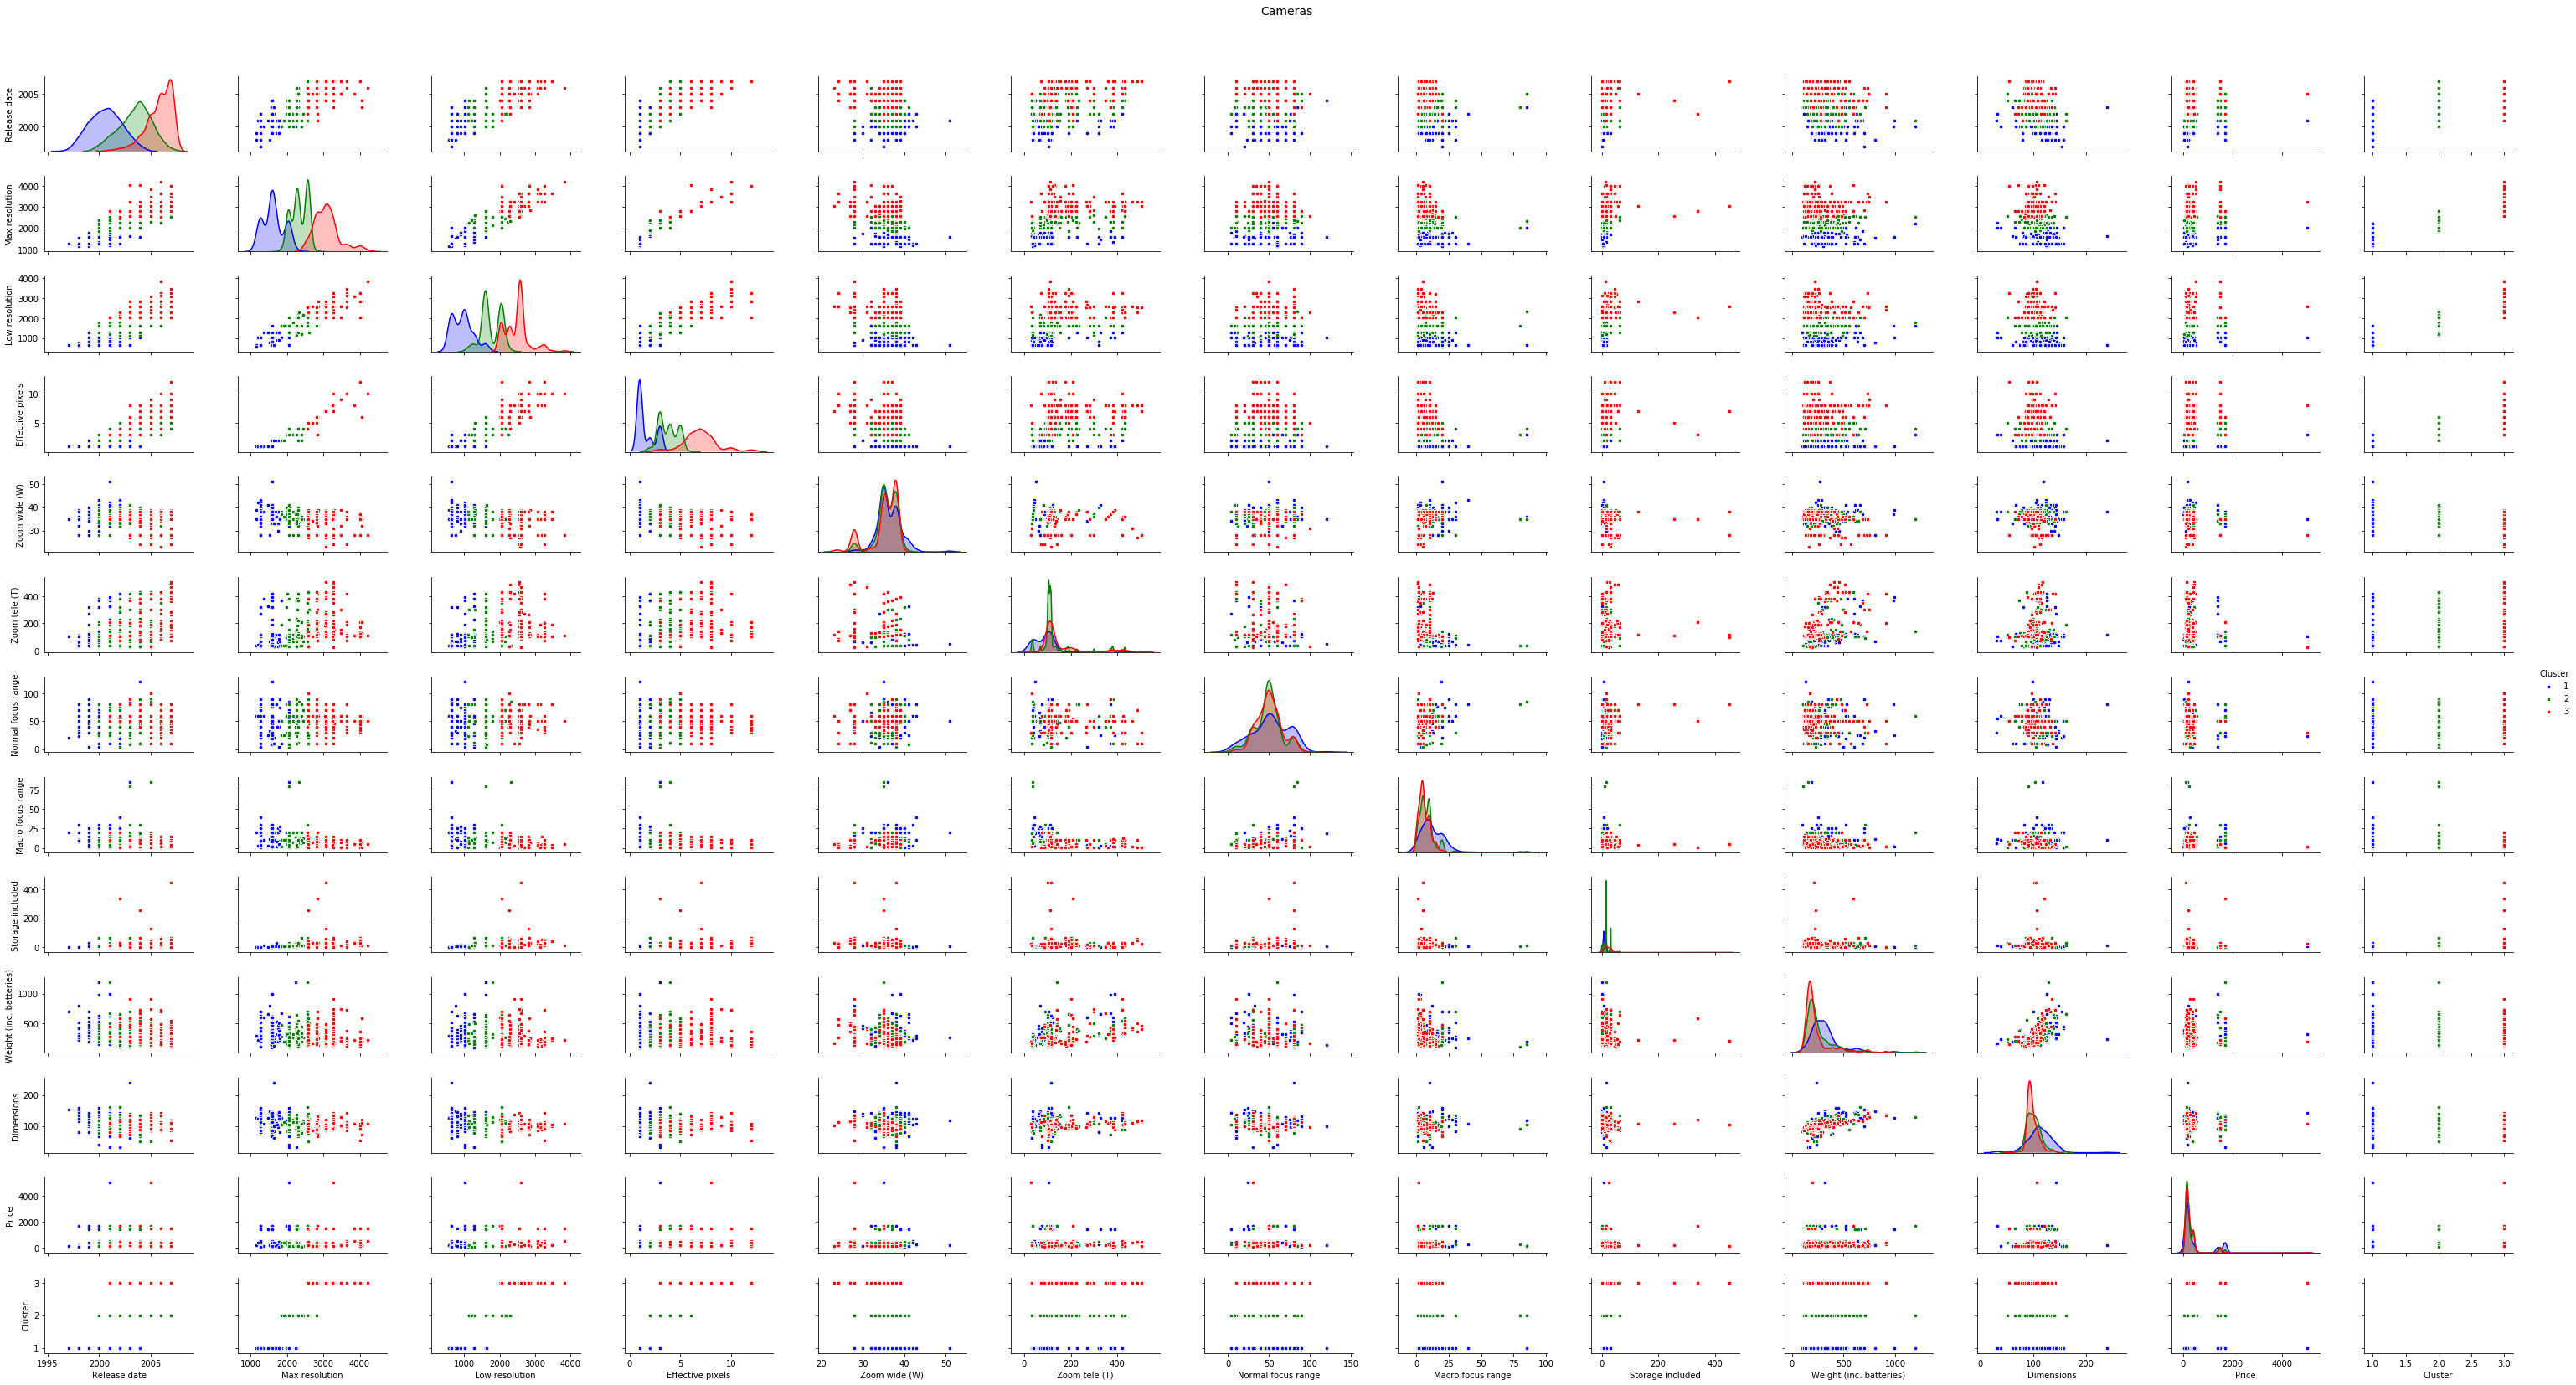

In [157]:
pp = sns.pairplot(df, size=1.8, aspect=1.8, hue="Cluster", palette=["b","g","r"],
                  plot_kws=dict(s=20),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Cameras', fontsize=14)

# Clustering berdasarkan 4 Fitur

## Inisialisasi Data

In [158]:
#load dataframe to notebook
DatasetAsli = pd.read_csv(filepath_or_buffer=localFilePath,sep=',')
DataFrame = pd.DataFrame(DatasetAsli)
#DataFrame = DataFrame.fillna(0) #Fill data yang berupa NaN dengan 0
DataFrame = DataFrame.dropna()
for features in DataFrame: #drop semua data yang nilainya 0.0 kecuali storage karena nilai storage 0 masuk akal
    if(features == "Storage included"):
        continue
    DataFrame = DataFrame[DataFrame[features] != 0.0]
DataFrame = DataFrame.reset_index(drop=True) #reset index setelah diremove
DataFrame = DataFrame.drop(columns="Model") #drop nama model biar gak diiolah
featureList = DataFrame.columns
DataFrame["Cluster"] = "" #tambah tag cluster untuk tiap row data
df=DataFrame
df = DataFrame.iloc[:,:4]
featureList = df.columns
df["Cluster"] = ""

jumlahData = DataFrame.shape[0]
print("Jumlah data keseluruhan\t:",jumlahData)

jumlahFeatures = featureList.size #cluster tidak dihitung sebagai fitur
#print(DataFrame)
print("Jumlah features\t\t:",jumlahFeatures)

Jumlah data keseluruhan	: 805
Jumlah features		: 4


In [159]:
print("\033[1m","\t\t\t\tData","\033[0m\n",df)

 				Data 
      Release date  Max resolution  Low resolution  Effective pixels Cluster
0            2001          1600.0           640.0               1.0        
1            2001          1280.0          1024.0               1.0        
2            2002          1280.0          1024.0               1.0        
3            2001          1600.0          1024.0               1.0        
4            2002          1600.0          1024.0               1.0        
..            ...             ...             ...               ...     ...
800          2001          2048.0          1024.0               3.0        
801          2000          2048.0          1024.0               3.0        
802          2001          2048.0          1024.0               3.0        
803          2001          2400.0          1200.0               3.0        
804          2002          1600.0           800.0               1.0        

[805 rows x 5 columns]


##### Tentukan jumlah cluster, threshold, dan F lama

In [160]:
jumlahCluster = 3
Threshold = 5000
Flama = 0

##### Randomize cluster untuk tiap data

In [161]:
random.seed(0)
for index in range(jumlahData):
    df["Cluster"][index] = random.randint(1,jumlahCluster)

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## Iterasi #1

##### Cluster awal

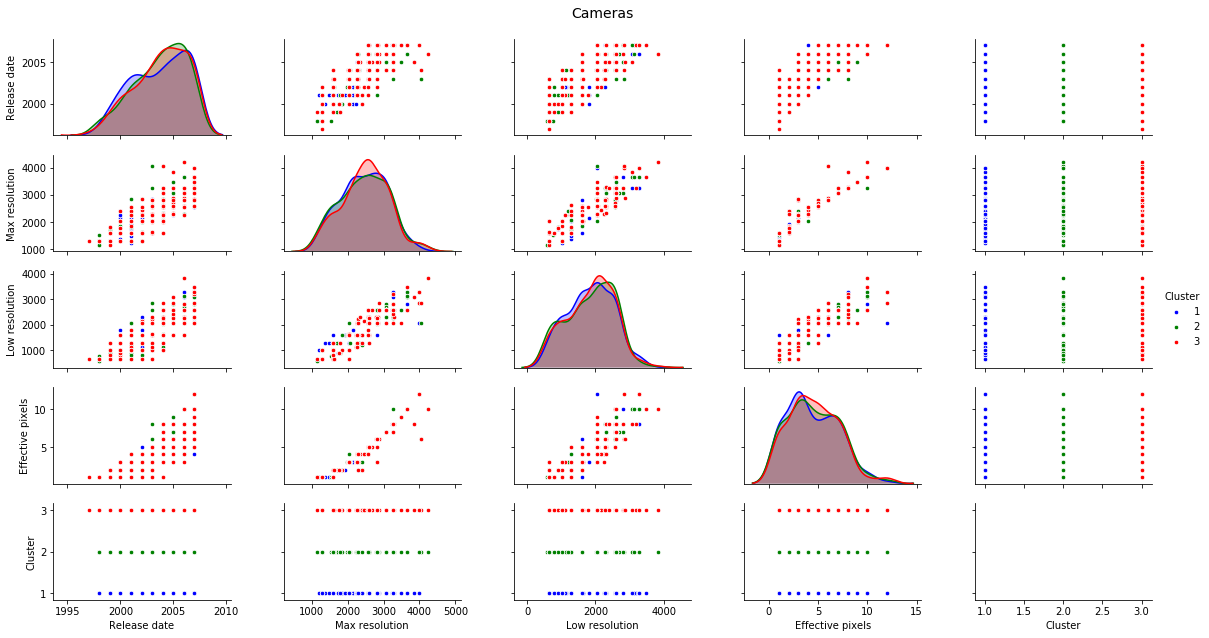

In [162]:
pp = sns.pairplot(df, size=1.8, aspect=1.8, hue="Cluster", palette=["b","g","r"],
                  plot_kws=dict(s=20),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Cameras', fontsize=14)

In [163]:
print(df)

     Release date  Max resolution  Low resolution  Effective pixels Cluster
0            2001          1600.0           640.0               1.0       2
1            2001          1280.0          1024.0               1.0       2
2            2002          1280.0          1024.0               1.0       1
3            2001          1600.0          1024.0               1.0       2
4            2002          1600.0          1024.0               1.0       3
..            ...             ...             ...               ...     ...
800          2001          2048.0          1024.0               3.0       3
801          2000          2048.0          1024.0               3.0       1
802          2001          2048.0          1024.0               3.0       1
803          2001          2400.0          1200.0               3.0       2
804          2002          1600.0           800.0               1.0       2

[805 rows x 5 columns]


##### Pemisahan data berdasarkan cluster

In [164]:
dfCluster = {}
for cluster in range(jumlahCluster):
    dfCluster[cluster+1] = df.loc[df["Cluster"] == (cluster+1)]
    dfCluster[cluster+1] = dfCluster[cluster+1].drop(columns="Cluster")
print(dfCluster)

{1:      Release date  Max resolution  Low resolution  Effective pixels
2            2002          1280.0          1024.0               1.0
11           2007          2592.0          2048.0               5.0
13           2006          2592.0          2048.0               5.0
15           2007          3072.0          2592.0               7.0
16           2007          3072.0          2592.0               7.0
..            ...             ...             ...               ...
795          1999          1280.0           640.0               1.0
797          1999          1600.0           800.0               1.0
799          2001          1792.0           896.0               2.0
801          2000          2048.0          1024.0               3.0
802          2001          2048.0          1024.0               3.0

[285 rows x 4 columns], 2:      Release date  Max resolution  Low resolution  Effective pixels
0            2001          1600.0           640.0               1.0
1            200

##### Nilai centroid dan jarak tiap data ke centroid

In [165]:
centroid = {}
for feature in featureList:
    centroid[feature] = {}
    for cluster in range(jumlahCluster):
        centroid[feature][cluster+1] = 0

for feature in featureList:
    for cluster in range(jumlahCluster):
        centroid[feature][cluster+1] = np.mean(dfCluster[cluster+1].loc[:,feature])
        
print(pd.DataFrame.from_dict(centroid))#.transpose())
print(df.iloc[:,:-1])

   Release date  Max resolution  Low resolution  Effective pixels
1   2003.726316     2459.164912     1855.607018          4.463158
2   2003.739464     2470.111111     1855.295019          4.574713
3   2003.857143     2494.409266     1868.100386          4.610039
     Release date  Max resolution  Low resolution  Effective pixels
0            2001          1600.0           640.0               1.0
1            2001          1280.0          1024.0               1.0
2            2002          1280.0          1024.0               1.0
3            2001          1600.0          1024.0               1.0
4            2002          1600.0          1024.0               1.0
..            ...             ...             ...               ...
800          2001          2048.0          1024.0               3.0
801          2000          2048.0          1024.0               3.0
802          2001          2048.0          1024.0               3.0
803          2001          2400.0          1200.0       

In [166]:
#print(df[fiturX][datakeN]-centroidX)
#jarakData
#jarakData[ke-N][keCentroidFitur]
tempJumlahSemuaFitur = {}
for dataKeN in range(jumlahData):
    tempJumlahSemuaFitur[dataKeN] = {}
    for cluster in range(jumlahCluster):
        tempJumlahSemuaFitur[dataKeN][cluster+1] = 0
        for feature in featureList:
            #print("Data ke-",dataKeN,"\nCluster ke-",cluster+1,"\nFeature: ",feature)
            #print((df.iloc[dataKeN:dataKeN+1].loc[:,feature] - centroid[feature][cluster+1])**2)
            tempJumlahSemuaFitur[dataKeN][cluster+1] += ((df.iloc[dataKeN:dataKeN+1].loc[:,feature] - centroid[feature][cluster+1])**2)
        tempJumlahSemuaFitur[dataKeN][cluster+1] = np.sqrt(tempJumlahSemuaFitur[dataKeN][cluster+1]) 
print(tempJumlahSemuaFitur)

{0: {1: 0    1488.584628
Name: Release date, dtype: float64, 2: 0    1494.675755
Name: Release date, dtype: float64, 3: 0    1519.282623
Name: Release date, dtype: float64}, 1: {1: 1    1442.920493
Name: Release date, dtype: float64, 2: 1    1451.701122
Name: Release date, dtype: float64, 3: 1    1478.957918
Name: Release date, dtype: float64}, 2: {1: 2    1442.91895
Name: Release date, dtype: float64, 2: 2    1451.69958
Name: Release date, dtype: float64, 3: 2    1478.956324
Name: Release date, dtype: float64}, 3: {1: 3    1195.723214
Name: Release date, dtype: float64, 2: 3    1203.39729
Name: Release date, dtype: float64, 3: 3    1229.835189
Name: Release date, dtype: float64}, 4: {1: 4    1195.721352
Name: Release date, dtype: float64, 2: 4    1203.395429
Name: Release date, dtype: float64, 3: 4    1229.833273
Name: Release date, dtype: float64}, 5: {1: 5    1442.91895
Name: Release date, dtype: float64, 2: 5    1451.69958
Name: Release date, dtype: float64, 3: 5    1478.956324
Nam

In [167]:
print(tempJumlahSemuaFitur[0]) #DATA UDAH BENER JANGAN DIUBAH2 LAGI
#baca: JARAK DATA KE-0 KE SETIAP CENTROID CLUSTER (1,2,3)

print(tempJumlahSemuaFitur[0][1])

{1: 0    1488.584628
Name: Release date, dtype: float64, 2: 0    1494.675755
Name: Release date, dtype: float64, 3: 0    1519.282623
Name: Release date, dtype: float64}
0    1488.584628
Name: Release date, dtype: float64


##### Total jumlah jarak tiap cluster

In [168]:
sigmaC = {}
for cluster in range(jumlahCluster):
    sigmaC[cluster+1] = 0
    for data in range(jumlahData):
        sigmaC[cluster+1] += tempJumlahSemuaFitur[data][cluster+1].values[0]
        #print(tempJumlahSemuaFitur[data][cluster+1].values[0])
print(sigmaC)

Fbaru = 0
for sigma in sigmaC:
    Fbaru += sigmaC[sigma]
print(Fbaru)

{1: 644592.7894538504, 2: 644231.29444371, 3: 642851.3838202598}
1931675.4677178203


##### Penghitungan delta dan pengecekan threshold

In [169]:
delta = abs(Fbaru-Flama)
print(delta,", sedangkan threshold adalah",Threshold)
if (delta > Threshold):
    print("Ulangi iterasi")
else:
    print("Stop! Sudah sesuai threshold")
Flama = Fbaru

1931675.4677178203 , sedangkan threshold adalah 5000
Ulangi iterasi


##### Memasukkan nilai cluster baru ke dataframe

In [170]:
#tempJumlahSemuaFitur[data][jarakKeCluster]
for data in range(jumlahData):
    for cluster in range(jumlahCluster):
        dataMin = min(tempJumlahSemuaFitur[data][1].values[0],tempJumlahSemuaFitur[data][2].values[0],tempJumlahSemuaFitur[data][3].values[0])
        if (tempJumlahSemuaFitur[data][cluster+1].values[0] == dataMin):
            newCluster = cluster+1
    df["Cluster"][data] = newCluster
    #print(newCluster)
print(df)

     Release date  Max resolution  Low resolution  Effective pixels Cluster
0            2001          1600.0           640.0               1.0       1
1            2001          1280.0          1024.0               1.0       1
2            2002          1280.0          1024.0               1.0       1
3            2001          1600.0          1024.0               1.0       1
4            2002          1600.0          1024.0               1.0       1
..            ...             ...             ...               ...     ...
800          2001          2048.0          1024.0               3.0       1
801          2000          2048.0          1024.0               3.0       1
802          2001          2048.0          1024.0               3.0       1
803          2001          2400.0          1200.0               3.0       1
804          2002          1600.0           800.0               1.0       1

[805 rows x 5 columns]


C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


##### Cluster baru

In [171]:
print(df)

     Release date  Max resolution  Low resolution  Effective pixels Cluster
0            2001          1600.0           640.0               1.0       1
1            2001          1280.0          1024.0               1.0       1
2            2002          1280.0          1024.0               1.0       1
3            2001          1600.0          1024.0               1.0       1
4            2002          1600.0          1024.0               1.0       1
..            ...             ...             ...               ...     ...
800          2001          2048.0          1024.0               3.0       1
801          2000          2048.0          1024.0               3.0       1
802          2001          2048.0          1024.0               3.0       1
803          2001          2400.0          1200.0               3.0       1
804          2002          1600.0           800.0               1.0       1

[805 rows x 5 columns]


## Iterasi #2
Iterasi akan terus berlanjut karena pada bagian "Penghitungan delta dan pengecekan threshold", hasil dari nilai delta yaitu 1931675.4677178203 lebih besar daripada nilai threshold yaitu 5000.

Cara iterasi 2 yang akan dilakukan adalah sama dengan cara yang sudah dilakukan pada iterasi 1 sehingga nantinya didapatkan nilai delta yang baru. Jika nilai delta baru masih lebih besar daripada nilai threshold, maka terus lakukan iterasi dampai nilai delta baru kurang dari nilai threshold. Namun apabila nilai delta baru sudah lebih kecil daripada nilai threshold, maka iterasi sudah bisa dihentikan.

##### Cluster awal

In [172]:
print(df)

     Release date  Max resolution  Low resolution  Effective pixels Cluster
0            2001          1600.0           640.0               1.0       1
1            2001          1280.0          1024.0               1.0       1
2            2002          1280.0          1024.0               1.0       1
3            2001          1600.0          1024.0               1.0       1
4            2002          1600.0          1024.0               1.0       1
..            ...             ...             ...               ...     ...
800          2001          2048.0          1024.0               3.0       1
801          2000          2048.0          1024.0               3.0       1
802          2001          2048.0          1024.0               3.0       1
803          2001          2400.0          1200.0               3.0       1
804          2002          1600.0           800.0               1.0       1

[805 rows x 5 columns]


##### Pemisahan data berdasarkan cluster

In [173]:
dfCluster = {}
for cluster in range(jumlahCluster):
    dfCluster[cluster+1] = df.loc[df["Cluster"] == (cluster+1)]
    dfCluster[cluster+1] = dfCluster[cluster+1].drop(columns="Cluster")
print(dfCluster)

{1:      Release date  Max resolution  Low resolution  Effective pixels
0            2001          1600.0           640.0               1.0
1            2001          1280.0          1024.0               1.0
2            2002          1280.0          1024.0               1.0
3            2001          1600.0          1024.0               1.0
4            2002          1600.0          1024.0               1.0
..            ...             ...             ...               ...
800          2001          2048.0          1024.0               3.0
801          2000          2048.0          1024.0               3.0
802          2001          2048.0          1024.0               3.0
803          2001          2400.0          1200.0               3.0
804          2002          1600.0           800.0               1.0

[364 rows x 4 columns], 2:      Release date  Max resolution  Low resolution  Effective pixels
29           2003          2592.0          1600.0               5.0
51           200

##### Nilai centroid dan jarak tiap data ke centroid

In [174]:
centroid = {}
for feature in featureList:
    centroid[feature] = {}
    for cluster in range(jumlahCluster):
        centroid[feature][cluster+1] = 0

for feature in featureList:
    for cluster in range(jumlahCluster):
        centroid[feature][cluster+1] = np.mean(dfCluster[cluster+1].loc[:,feature])
        
print(pd.DataFrame.from_dict(centroid))#.transpose())
print(df.iloc[:,:-1])

   Release date  Max resolution  Low resolution  Effective pixels
1   2001.700549     1886.582418     1258.076923          2.304945
2   2003.421053     2576.000000     1552.000000          4.631579
3   2005.575829     2976.191943     2392.156398          6.476303
     Release date  Max resolution  Low resolution  Effective pixels
0            2001          1600.0           640.0               1.0
1            2001          1280.0          1024.0               1.0
2            2002          1280.0          1024.0               1.0
3            2001          1600.0          1024.0               1.0
4            2002          1600.0          1024.0               1.0
..            ...             ...             ...               ...
800          2001          2048.0          1024.0               3.0
801          2000          2048.0          1024.0               3.0
802          2001          2048.0          1024.0               3.0
803          2001          2400.0          1200.0       

In [175]:
#print(df[fiturX][datakeN]-centroidX)
#jarakData
#jarakData[ke-N][keCentroidFitur]
tempJumlahSemuaFitur = {}
for dataKeN in range(jumlahData):
    tempJumlahSemuaFitur[dataKeN] = {}
    for cluster in range(jumlahCluster):
        tempJumlahSemuaFitur[dataKeN][cluster+1] = 0
        for feature in featureList:
            #print("Data ke-",dataKeN,"\nCluster ke-",cluster+1,"\nFeature: ",feature)
            #print((df.iloc[dataKeN:dataKeN+1].loc[:,feature] - centroid[feature][cluster+1])**2)
            tempJumlahSemuaFitur[dataKeN][cluster+1] += ((df.iloc[dataKeN:dataKeN+1].loc[:,feature] - centroid[feature][cluster+1])**2)
        tempJumlahSemuaFitur[dataKeN][cluster+1] = np.sqrt(tempJumlahSemuaFitur[dataKeN][cluster+1]) 
print(tempJumlahSemuaFitur)

{0: {1: 0    681.286106
Name: Release date, dtype: float64, 2: 0    1335.791544
Name: Release date, dtype: float64, 3: 0    2228.005215
Name: Release date, dtype: float64}, 1: {1: 1    650.181843
Name: Release date, dtype: float64, 2: 1    1399.435261
Name: Release date, dtype: float64, 3: 1    2179.213153
Name: Release date, dtype: float64}, 2: {1: 2    650.181534
Name: Release date, dtype: float64, 2: 2    1399.433888
Name: Release date, dtype: float64, 3: 2    2179.211283
Name: Release date, dtype: float64}, 3: {1: 3    370.032001
Name: Release date, dtype: float64, 2: 3    1109.6752
Name: Release date, dtype: float64, 3: 3    1940.568763
Name: Release date, dtype: float64}, 4: {1: 4    370.031459
Name: Release date, dtype: float64, 2: 4    1109.673469
Name: Release date, dtype: float64, 3: 4    1940.566662
Name: Release date, dtype: float64}, 5: {1: 5    650.181534
Name: Release date, dtype: float64, 2: 5    1399.433888
Name: Release date, dtype: float64, 3: 5    2179.211283
Name: 

In [176]:
print(tempJumlahSemuaFitur[0]) #DATA UDAH BENER JANGAN DIUBAH2 LAGI
#baca: JARAK DATA KE-0 KE SETIAP CENTROID CLUSTER (1,2,3)

print(tempJumlahSemuaFitur[0][1])

{1: 0    681.286106
Name: Release date, dtype: float64, 2: 0    1335.791544
Name: Release date, dtype: float64, 3: 0    2228.005215
Name: Release date, dtype: float64}
0    681.286106
Name: Release date, dtype: float64


##### Total jumlah jarak tiap cluster

In [177]:
sigmaC = {}
for cluster in range(jumlahCluster):
    sigmaC[cluster+1] = 0
    for data in range(jumlahData):
        sigmaC[cluster+1] += tempJumlahSemuaFitur[data][cluster+1].values[0]
        #print(tempJumlahSemuaFitur[data][cluster+1].values[0])
print(sigmaC)

Fbaru = 0
for sigma in sigmaC:
    Fbaru += sigmaC[sigma]
print(Fbaru)

{1: 867654.9355425236, 2: 707808.7397212423, 3: 776436.5440659374}
2351900.2193297036


##### Penghitungan delta dan pengecekan threshold

In [178]:
delta = abs(Fbaru-Flama)
print(delta,", sedangkan threshold adalah",Threshold)
if (delta > Threshold):
    print("Ulangi iterasi")
else:
    print("Stop! Sudah sesuai threshold")
Flama = Fbaru

420224.7516118833 , sedangkan threshold adalah 5000
Ulangi iterasi


##### Memasukkan nilai cluster baru ke dataframe

In [179]:
#tempJumlahSemuaFitur[data][jarakKeCluster]
for data in range(jumlahData):
    for cluster in range(jumlahCluster):
        dataMin = min(tempJumlahSemuaFitur[data][1].values[0],tempJumlahSemuaFitur[data][2].values[0],tempJumlahSemuaFitur[data][3].values[0])
        if (tempJumlahSemuaFitur[data][cluster+1].values[0] == dataMin):
            newCluster = cluster+1
    df["Cluster"][data] = newCluster
print(newCluster)

1


C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


##### Cluster baru

In [180]:
print(df)

     Release date  Max resolution  Low resolution  Effective pixels Cluster
0            2001          1600.0           640.0               1.0       1
1            2001          1280.0          1024.0               1.0       1
2            2002          1280.0          1024.0               1.0       1
3            2001          1600.0          1024.0               1.0       1
4            2002          1600.0          1024.0               1.0       1
..            ...             ...             ...               ...     ...
800          2001          2048.0          1024.0               3.0       1
801          2000          2048.0          1024.0               3.0       1
802          2001          2048.0          1024.0               3.0       1
803          2001          2400.0          1200.0               3.0       2
804          2002          1600.0           800.0               1.0       1

[805 rows x 5 columns]


In [181]:
# pp = sns.pairplot(df, size=1.8, aspect=1.8, hue="Cluster", palette=["b","g","r"],
#                   plot_kws=dict(s=20),
#                   diag_kind="kde", diag_kws=dict(shade=True))

# fig = pp.fig 
# fig.subplots_adjust(top=0.93, wspace=0.3)
# t = fig.suptitle('Cameras', fontsize=14)

## Iterasi #3
Iterasi akan terus berlanjut karena pada bagian "Penghitungan delta dan pengecekan threshold", hasil dari nilai delta yaitu 420224.7516118833 lebih besar daripada nilai threshold yaitu 5000.

Cara iterasi 3 yang akan dilakukan adalah sama dengan cara yang sudah dilakukan pada iterasi 1 dan 2 sehingga nantinya didapatkan nilai delta yang baru. Jika nilai delta baru masih lebih besar daripada nilai threshold, maka terus lakukan iterasi dampai nilai delta baru kurang dari nilai threshold. Namun apabila nilai delta baru sudah lebih kecil daripada nilai threshold, maka iterasi sudah bisa dihentikan.

##### Cluster awal

In [182]:
print(df)

     Release date  Max resolution  Low resolution  Effective pixels Cluster
0            2001          1600.0           640.0               1.0       1
1            2001          1280.0          1024.0               1.0       1
2            2002          1280.0          1024.0               1.0       1
3            2001          1600.0          1024.0               1.0       1
4            2002          1600.0          1024.0               1.0       1
..            ...             ...             ...               ...     ...
800          2001          2048.0          1024.0               3.0       1
801          2000          2048.0          1024.0               3.0       1
802          2001          2048.0          1024.0               3.0       1
803          2001          2400.0          1200.0               3.0       2
804          2002          1600.0           800.0               1.0       1

[805 rows x 5 columns]


##### Pemisahan data berdasarkan cluster

In [183]:
dfCluster = {}
for cluster in range(jumlahCluster):
    dfCluster[cluster+1] = df.loc[df["Cluster"] == (cluster+1)]
    dfCluster[cluster+1] = dfCluster[cluster+1].drop(columns="Cluster")
print(dfCluster)

{1:      Release date  Max resolution  Low resolution  Effective pixels
0            2001          1600.0           640.0               1.0
1            2001          1280.0          1024.0               1.0
2            2002          1280.0          1024.0               1.0
3            2001          1600.0          1024.0               1.0
4            2002          1600.0          1024.0               1.0
..            ...             ...             ...               ...
799          2001          1792.0           896.0               2.0
800          2001          2048.0          1024.0               3.0
801          2000          2048.0          1024.0               3.0
802          2001          2048.0          1024.0               3.0
804          2002          1600.0           800.0               1.0

[269 rows x 4 columns], 2:      Release date  Max resolution  Low resolution  Effective pixels
8            2006          2272.0          1600.0               4.0
9            200

##### Nilai centroid dan jarak tiap data ke centroid

In [184]:
centroid = {}
for feature in featureList:
    centroid[feature] = {}
    for cluster in range(jumlahCluster):
        centroid[feature][cluster+1] = 0

for feature in featureList:
    for cluster in range(jumlahCluster):
        centroid[feature][cluster+1] = np.mean(dfCluster[cluster+1].loc[:,feature])
        
print(pd.DataFrame.from_dict(centroid))#.transpose())
print(df.iloc[:,:-1])

   Release date  Max resolution  Low resolution  Effective pixels
1   2001.178439     1744.821561     1104.460967          1.940520
2   2003.829146     2444.678392     1824.763819          4.070352
3   2005.810089     3073.486647     2482.759644          6.908012
     Release date  Max resolution  Low resolution  Effective pixels
0            2001          1600.0           640.0               1.0
1            2001          1280.0          1024.0               1.0
2            2002          1280.0          1024.0               1.0
3            2001          1600.0          1024.0               1.0
4            2002          1600.0          1024.0               1.0
..            ...             ...             ...               ...
800          2001          2048.0          1024.0               3.0
801          2000          2048.0          1024.0               3.0
802          2001          2048.0          1024.0               3.0
803          2001          2400.0          1200.0       

In [185]:
#print(df[fiturX][datakeN]-centroidX)
#jarakData
#jarakData[ke-N][keCentroidFitur]
tempJumlahSemuaFitur = {}
for dataKeN in range(jumlahData):
    tempJumlahSemuaFitur[dataKeN] = {}
    for cluster in range(jumlahCluster):
        tempJumlahSemuaFitur[dataKeN][cluster+1] = 0
        for feature in featureList:
            #print("Data ke-",dataKeN,"\nCluster ke-",cluster+1,"\nFeature: ",feature)
            #print((df.iloc[dataKeN:dataKeN+1].loc[:,feature] - centroid[feature][cluster+1])**2)
            tempJumlahSemuaFitur[dataKeN][cluster+1] += ((df.iloc[dataKeN:dataKeN+1].loc[:,feature] - centroid[feature][cluster+1])**2)
        tempJumlahSemuaFitur[dataKeN][cluster+1] = np.sqrt(tempJumlahSemuaFitur[dataKeN][cluster+1]) 
print(tempJumlahSemuaFitur)

{0: {1: 0    486.516383
Name: Release date, dtype: float64, 2: 0    1455.047877
Name: Release date, dtype: float64, 3: 0    2359.445707
Name: Release date, dtype: float64}, 1: {1: 1    471.735061
Name: Release date, dtype: float64, 2: 1    1413.405774
Name: Release date, dtype: float64, 3: 1    2311.846036
Name: Release date, dtype: float64}, 2: {1: 2    471.735742
Name: Release date, dtype: float64, 2: 2    1413.404126
Name: Release date, dtype: float64, 3: 2    2311.844171
Name: Release date, dtype: float64}, 3: {1: 3    165.674887
Name: Release date, dtype: float64, 2: 3    1163.925131
Name: Release date, dtype: float64, 3: 3    2073.451383
Name: Release date, dtype: float64}, 4: {1: 4    165.676828
Name: Release date, dtype: float64, 2: 4    1163.92313
Name: Release date, dtype: float64, 3: 4    2073.449305
Name: Release date, dtype: float64}, 5: {1: 5    471.735742
Name: Release date, dtype: float64, 2: 5    1413.404126
Name: Release date, dtype: float64, 3: 5    2311.844171
Name:

In [186]:
print(tempJumlahSemuaFitur[0]) #DATA UDAH BENER JANGAN DIUBAH2 LAGI
#baca: JARAK DATA KE-0 KE SETIAP CENTROID CLUSTER (1,2,3)

print(tempJumlahSemuaFitur[0][1])

{1: 0    486.516383
Name: Release date, dtype: float64, 2: 0    1455.047877
Name: Release date, dtype: float64, 3: 0    2359.445707
Name: Release date, dtype: float64}
0    486.516383
Name: Release date, dtype: float64


##### Total jumlah jarak tiap cluster

In [187]:
sigmaC = {}
for cluster in range(jumlahCluster):
    sigmaC[cluster+1] = 0
    for data in range(jumlahData):
        sigmaC[cluster+1] += tempJumlahSemuaFitur[data][cluster+1].values[0]
        #print(tempJumlahSemuaFitur[data][cluster+1].values[0])
print(sigmaC)

Fbaru = 0
for sigma in sigmaC:
    Fbaru += sigmaC[sigma]
print(Fbaru)

{1: 968797.0804942574, 2: 647123.2306808493, 3: 829991.85914748}
2445912.170322587


##### Penghitungan delta dan pengecekan threshold

In [188]:
delta = abs(Fbaru-Flama)
print(delta,", sedangkan threshold adalah",Threshold)
if (delta > Threshold):
    print("Ulangi iterasi")
else:
    print("Stop! Sudah sesuai threshold")
Flama = Fbaru

94011.95099288318 , sedangkan threshold adalah 5000
Ulangi iterasi


##### Memasukkan nilai cluster baru ke dataframe

In [189]:
#tempJumlahSemuaFitur[data][jarakKeCluster]
for data in range(jumlahData):
    for cluster in range(jumlahCluster):
        dataMin = min(tempJumlahSemuaFitur[data][1].values[0],tempJumlahSemuaFitur[data][2].values[0],tempJumlahSemuaFitur[data][3].values[0])
        if (tempJumlahSemuaFitur[data][cluster+1].values[0] == dataMin):
            newCluster = cluster+1
    df["Cluster"][data] = newCluster
print(newCluster)

1


C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


##### Cluster baru

In [190]:
print(df)

     Release date  Max resolution  Low resolution  Effective pixels Cluster
0            2001          1600.0           640.0               1.0       1
1            2001          1280.0          1024.0               1.0       1
2            2002          1280.0          1024.0               1.0       1
3            2001          1600.0          1024.0               1.0       1
4            2002          1600.0          1024.0               1.0       1
..            ...             ...             ...               ...     ...
800          2001          2048.0          1024.0               3.0       1
801          2000          2048.0          1024.0               3.0       1
802          2001          2048.0          1024.0               3.0       1
803          2001          2400.0          1200.0               3.0       2
804          2002          1600.0           800.0               1.0       1

[805 rows x 5 columns]


In [191]:
# pp = sns.pairplot(df, size=1.8, aspect=1.8, hue="Cluster", palette=["b","g","r"],
#                   plot_kws=dict(s=20),
#                   diag_kind="kde", diag_kws=dict(shade=True))

# fig = pp.fig 
# fig.subplots_adjust(top=0.93, wspace=0.3)
# t = fig.suptitle('Cameras', fontsize=14)

## Iterasi #4
Iterasi akan terus berlanjut karena pada bagian "Penghitungan delta dan pengecekan threshold", hasil dari nilai delta yaitu 94011.95099288318 lebih besar daripada nilai threshold yaitu 5000.

Cara iterasi 4 yang akan dilakukan adalah sama dengan cara yang sudah dilakukan pada iterasi 1, 2, dan 3 sehingga nantinya didapatkan nilai delta yang baru. Jika nilai delta baru masih lebih besar daripada nilai threshold, maka terus lakukan iterasi dampai nilai delta baru kurang dari nilai threshold. Namun apabila nilai delta baru sudah lebih kecil daripada nilai threshold, maka iterasi sudah bisa dihentikan.

##### Cluster awal

In [192]:
print(df)

     Release date  Max resolution  Low resolution  Effective pixels Cluster
0            2001          1600.0           640.0               1.0       1
1            2001          1280.0          1024.0               1.0       1
2            2002          1280.0          1024.0               1.0       1
3            2001          1600.0          1024.0               1.0       1
4            2002          1600.0          1024.0               1.0       1
..            ...             ...             ...               ...     ...
800          2001          2048.0          1024.0               3.0       1
801          2000          2048.0          1024.0               3.0       1
802          2001          2048.0          1024.0               3.0       1
803          2001          2400.0          1200.0               3.0       2
804          2002          1600.0           800.0               1.0       1

[805 rows x 5 columns]


##### Pemisahan data berdasarkan cluster

In [193]:
dfCluster = {}
for cluster in range(jumlahCluster):
    dfCluster[cluster+1] = df.loc[df["Cluster"] == (cluster+1)]
    dfCluster[cluster+1] = dfCluster[cluster+1].drop(columns="Cluster")
print(dfCluster)

{1:      Release date  Max resolution  Low resolution  Effective pixels
0            2001          1600.0           640.0               1.0
1            2001          1280.0          1024.0               1.0
2            2002          1280.0          1024.0               1.0
3            2001          1600.0          1024.0               1.0
4            2002          1600.0          1024.0               1.0
..            ...             ...             ...               ...
799          2001          1792.0           896.0               2.0
800          2001          2048.0          1024.0               3.0
801          2000          2048.0          1024.0               3.0
802          2001          2048.0          1024.0               3.0
804          2002          1600.0           800.0               1.0

[201 rows x 4 columns], 2:      Release date  Max resolution  Low resolution  Effective pixels
6            2003          2048.0          1600.0               3.0
8            200

##### Nilai centroid dan jarak tiap data ke centroid

In [194]:
centroid = {}
for feature in featureList:
    centroid[feature] = {}
    for cluster in range(jumlahCluster):
        centroid[feature][cluster+1] = 0

for feature in featureList:
    for cluster in range(jumlahCluster):
        centroid[feature][cluster+1] = np.mean(dfCluster[cluster+1].loc[:,feature])
        
print(pd.DataFrame.from_dict(centroid))#.transpose())
print(df.iloc[:,:-1])

   Release date  Max resolution  Low resolution  Effective pixels
1   2000.681592     1643.527363      935.920398          1.577114
2   2003.838068     2433.267045     1854.696023          4.102273
3   2006.146825     3193.468254     2602.956349          7.535714
     Release date  Max resolution  Low resolution  Effective pixels
0            2001          1600.0           640.0               1.0
1            2001          1280.0          1024.0               1.0
2            2002          1280.0          1024.0               1.0
3            2001          1600.0          1024.0               1.0
4            2002          1600.0          1024.0               1.0
..            ...             ...             ...               ...
800          2001          2048.0          1024.0               3.0
801          2000          2048.0          1024.0               3.0
802          2001          2048.0          1024.0               3.0
803          2001          2400.0          1200.0       

In [195]:
#print(df[fiturX][datakeN]-centroidX)
#jarakData
#jarakData[ke-N][keCentroidFitur]
tempJumlahSemuaFitur = {}
for dataKeN in range(jumlahData):
    tempJumlahSemuaFitur[dataKeN] = {}
    for cluster in range(jumlahCluster):
        tempJumlahSemuaFitur[dataKeN][cluster+1] = 0
        for feature in featureList:
            #print("Data ke-",dataKeN,"\nCluster ke-",cluster+1,"\nFeature: ",feature)
            #print((df.iloc[dataKeN:dataKeN+1].loc[:,feature] - centroid[feature][cluster+1])**2)
            tempJumlahSemuaFitur[dataKeN][cluster+1] += ((df.iloc[dataKeN:dataKeN+1].loc[:,feature] - centroid[feature][cluster+1])**2)
        tempJumlahSemuaFitur[dataKeN][cluster+1] = np.sqrt(tempJumlahSemuaFitur[dataKeN][cluster+1]) 
print(tempJumlahSemuaFitur)

{0: {1: 0    299.105245
Name: Release date, dtype: float64, 2: 0    1473.037024
Name: Release date, dtype: float64, 3: 0    2528.321164
Name: Release date, dtype: float64}, 1: {1: 1    374.046246
Name: Release date, dtype: float64, 2: 1    1421.301671
Name: Release date, dtype: float64, 3: 1    2480.83315
Name: Release date, dtype: float64}, 2: {1: 2    374.048434
Name: Release date, dtype: float64, 2: 2    1421.300026
Name: Release date, dtype: float64, 3: 2    2480.831277
Name: Release date, dtype: float64}, 3: {1: 3    98.2501
Name: Release date, dtype: float64, 2: 3    1176.608486
Name: Release date, dtype: float64, 3: 3    2243.281845
Name: Release date, dtype: float64}, 4: {1: 4    98.258429
Name: Release date, dtype: float64, 2: 4    1176.606499
Name: Release date, dtype: float64, 3: 4    2243.279773
Name: Release date, dtype: float64}, 5: {1: 5    374.048434
Name: Release date, dtype: float64, 2: 5    1421.300026
Name: Release date, dtype: float64, 3: 5    2480.831277
Name: Rel

In [196]:
print(tempJumlahSemuaFitur[0]) #DATA UDAH BENER JANGAN DIUBAH2 LAGI
#baca: JARAK DATA KE-0 KE SETIAP CENTROID CLUSTER (1,2,3)

print(tempJumlahSemuaFitur[0][1])

{1: 0    299.105245
Name: Release date, dtype: float64, 2: 0    1473.037024
Name: Release date, dtype: float64, 3: 0    2528.321164
Name: Release date, dtype: float64}
0    299.105245
Name: Release date, dtype: float64


##### Total jumlah jarak tiap cluster

In [197]:
sigmaC = {}
for cluster in range(jumlahCluster):
    sigmaC[cluster+1] = 0
    for data in range(jumlahData):
        sigmaC[cluster+1] += tempJumlahSemuaFitur[data][cluster+1].values[0]
        #print(tempJumlahSemuaFitur[data][cluster+1].values[0])
print(sigmaC)

Fbaru = 0
for sigma in sigmaC:
    Fbaru += sigmaC[sigma]
print(Fbaru)

{1: 1075130.7772938607, 2: 645960.1348435124, 3: 918213.0365832425}
2639303.9487206154


##### Penghitungan delta dan pengecekan threshold

In [198]:
delta = abs(Fbaru-Flama)
print(delta,", sedangkan threshold adalah",Threshold)
if (delta > Threshold):
    print("Ulangi iterasi")
else:
    print("Stop! Sudah sesuai threshold")
Flama = Fbaru

193391.77839802857 , sedangkan threshold adalah 5000
Ulangi iterasi


Pada iterasi ini, nilai delta naik dari nilai sebelumnya. Hal ini dapat terjadi karena pengurangan nilai fungsi objektif bersifat mutlak sehingga tidak menutup kemungkinan adanya pengurangan yang berlebih.

##### Memasukkan nilai cluster baru ke dataframe

In [199]:
#tempJumlahSemuaFitur[data][jarakKeCluster]
for data in range(jumlahData):
    for cluster in range(jumlahCluster):
        dataMin = min(tempJumlahSemuaFitur[data][1].values[0],tempJumlahSemuaFitur[data][2].values[0],tempJumlahSemuaFitur[data][3].values[0])
        if (tempJumlahSemuaFitur[data][cluster+1].values[0] == dataMin):
            newCluster = cluster+1
    df["Cluster"][data] = newCluster
print(newCluster)

1


C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


##### Cluster baru

In [200]:
print(df)

     Release date  Max resolution  Low resolution  Effective pixels Cluster
0            2001          1600.0           640.0               1.0       1
1            2001          1280.0          1024.0               1.0       1
2            2002          1280.0          1024.0               1.0       1
3            2001          1600.0          1024.0               1.0       1
4            2002          1600.0          1024.0               1.0       1
..            ...             ...             ...               ...     ...
800          2001          2048.0          1024.0               3.0       1
801          2000          2048.0          1024.0               3.0       1
802          2001          2048.0          1024.0               3.0       1
803          2001          2400.0          1200.0               3.0       2
804          2002          1600.0           800.0               1.0       1

[805 rows x 5 columns]


In [201]:
# pp = sns.pairplot(df, size=1.8, aspect=1.8, hue="Cluster", palette=["b","g","r"],
#                   plot_kws=dict(s=20),
#                   diag_kind="kde", diag_kws=dict(shade=True))

# fig = pp.fig 
# fig.subplots_adjust(top=0.93, wspace=0.3)
# t = fig.suptitle('Cameras', fontsize=14)

## Iterasi #5
Iterasi akan terus berlanjut karena pada bagian "Penghitungan delta dan pengecekan threshold", hasil dari nilai delta yaitu 193391.77839802857 lebih besar daripada nilai threshold yaitu 5000.

Cara iterasi 5 yang akan dilakukan adalah sama dengan cara yang sudah dilakukan pada iterasi 1, 2, 3, dan 4 sehingga nantinya didapatkan nilai delta yang baru. Jika nilai delta baru masih lebih besar daripada nilai threshold, maka terus lakukan iterasi dampai nilai delta baru kurang dari nilai threshold. Namun apabila nilai delta baru sudah lebih kecil daripada nilai threshold, maka iterasi sudah bisa dihentikan.

##### Cluster awal

In [202]:
print(df)

     Release date  Max resolution  Low resolution  Effective pixels Cluster
0            2001          1600.0           640.0               1.0       1
1            2001          1280.0          1024.0               1.0       1
2            2002          1280.0          1024.0               1.0       1
3            2001          1600.0          1024.0               1.0       1
4            2002          1600.0          1024.0               1.0       1
..            ...             ...             ...               ...     ...
800          2001          2048.0          1024.0               3.0       1
801          2000          2048.0          1024.0               3.0       1
802          2001          2048.0          1024.0               3.0       1
803          2001          2400.0          1200.0               3.0       2
804          2002          1600.0           800.0               1.0       1

[805 rows x 5 columns]


##### Pemisahan data berdasarkan cluster

In [203]:
dfCluster = {}
for cluster in range(jumlahCluster):
    dfCluster[cluster+1] = df.loc[df["Cluster"] == (cluster+1)]
    dfCluster[cluster+1] = dfCluster[cluster+1].drop(columns="Cluster")
print(dfCluster)

{1:      Release date  Max resolution  Low resolution  Effective pixels
0            2001          1600.0           640.0               1.0
1            2001          1280.0          1024.0               1.0
2            2002          1280.0          1024.0               1.0
3            2001          1600.0          1024.0               1.0
4            2002          1600.0          1024.0               1.0
..            ...             ...             ...               ...
799          2001          1792.0           896.0               2.0
800          2001          2048.0          1024.0               3.0
801          2000          2048.0          1024.0               3.0
802          2001          2048.0          1024.0               3.0
804          2002          1600.0           800.0               1.0

[196 rows x 4 columns], 2:      Release date  Max resolution  Low resolution  Effective pixels
6            2003          2048.0          1600.0               3.0
8            200

##### Nilai centroid dan jarak tiap data ke centroid

In [204]:
centroid = {}
for feature in featureList:
    centroid[feature] = {}
    for cluster in range(jumlahCluster):
        centroid[feature][cluster+1] = 0

for feature in featureList:
    for cluster in range(jumlahCluster):
        centroid[feature][cluster+1] = np.mean(dfCluster[cluster+1].loc[:,feature])
        
print(pd.DataFrame.from_dict(centroid))#.transpose())
print(df.iloc[:,:-1])

   Release date  Max resolution  Low resolution  Effective pixels
1   2000.673469     1633.535714      922.244898          1.556122
2   2003.798319     2427.691877     1849.336134          4.078431
3   2006.146825     3193.468254     2602.956349          7.535714
     Release date  Max resolution  Low resolution  Effective pixels
0            2001          1600.0           640.0               1.0
1            2001          1280.0          1024.0               1.0
2            2002          1280.0          1024.0               1.0
3            2001          1600.0          1024.0               1.0
4            2002          1600.0          1024.0               1.0
..            ...             ...             ...               ...
800          2001          2048.0          1024.0               3.0
801          2000          2048.0          1024.0               3.0
802          2001          2048.0          1024.0               3.0
803          2001          2400.0          1200.0       

In [205]:
#print(df[fiturX][datakeN]-centroidX)
#jarakData
#jarakData[ke-N][keCentroidFitur]
tempJumlahSemuaFitur = {}
for dataKeN in range(jumlahData):
    tempJumlahSemuaFitur[dataKeN] = {}
    for cluster in range(jumlahCluster):
        tempJumlahSemuaFitur[dataKeN][cluster+1] = 0
        for feature in featureList:
            #print("Data ke-",dataKeN,"\nCluster ke-",cluster+1,"\nFeature: ",feature)
            #print((df.iloc[dataKeN:dataKeN+1].loc[:,feature] - centroid[feature][cluster+1])**2)
            tempJumlahSemuaFitur[dataKeN][cluster+1] += ((df.iloc[dataKeN:dataKeN+1].loc[:,feature] - centroid[feature][cluster+1])**2)
        tempJumlahSemuaFitur[dataKeN][cluster+1] = np.sqrt(tempJumlahSemuaFitur[dataKeN][cluster+1]) 
print(tempJumlahSemuaFitur)

{0: {1: 0    284.230967
Name: Release date, dtype: float64, 2: 0    1465.464103
Name: Release date, dtype: float64, 3: 0    2528.321164
Name: Release date, dtype: float64}, 1: {1: 1    367.888594
Name: Release date, dtype: float64, 2: 1    1413.645531
Name: Release date, dtype: float64, 3: 1    2480.83315
Name: Release date, dtype: float64}, 2: {1: 2    367.890841
Name: Release date, dtype: float64, 2: 2    1413.643905
Name: Release date, dtype: float64, 3: 2    2480.831277
Name: Release date, dtype: float64}, 3: {1: 3    107.140846
Name: Release date, dtype: float64, 2: 3    1168.875907
Name: Release date, dtype: float64, 3: 3    2243.281845
Name: Release date, dtype: float64}, 4: {1: 4    107.14856
Name: Release date, dtype: float64, 2: 4    1168.87394
Name: Release date, dtype: float64, 3: 4    2243.279773
Name: Release date, dtype: float64}, 5: {1: 5    367.890841
Name: Release date, dtype: float64, 2: 5    1413.643905
Name: Release date, dtype: float64, 3: 5    2480.831277
Name: R

In [206]:
print(tempJumlahSemuaFitur[0]) #DATA UDAH BENER JANGAN DIUBAH2 LAGI
#baca: JARAK DATA KE-0 KE SETIAP CENTROID CLUSTER (1,2,3)

print(tempJumlahSemuaFitur[0][1])

{1: 0    284.230967
Name: Release date, dtype: float64, 2: 0    1465.464103
Name: Release date, dtype: float64, 3: 0    2528.321164
Name: Release date, dtype: float64}
0    284.230967
Name: Release date, dtype: float64


##### Total jumlah jarak tiap cluster

In [207]:
sigmaC = {}
for cluster in range(jumlahCluster):
    sigmaC[cluster+1] = 0
    for data in range(jumlahData):
        sigmaC[cluster+1] += tempJumlahSemuaFitur[data][cluster+1].values[0]
        #print(tempJumlahSemuaFitur[data][cluster+1].values[0])
print(sigmaC)

Fbaru = 0
for sigma in sigmaC:
    Fbaru += sigmaC[sigma]
print(Fbaru)

{1: 1085302.7035865113, 2: 646555.7711765951, 3: 918213.0365832425}
2650071.511346349


##### Penghitungan delta dan pengecekan threshold

In [208]:
delta = abs(Fbaru-Flama)
print(delta,", sedangkan threshold adalah",Threshold)
if (delta > Threshold):
    print("Ulangi iterasi")
else:
    print("Stop! Sudah sesuai threshold")
Flama = Fbaru

10767.56262573367 , sedangkan threshold adalah 5000
Ulangi iterasi


##### Memasukkan nilai cluster baru ke dataframe

In [209]:
#tempJumlahSemuaFitur[data][jarakKeCluster]
for data in range(jumlahData):
    for cluster in range(jumlahCluster):
        dataMin = min(tempJumlahSemuaFitur[data][1].values[0],tempJumlahSemuaFitur[data][2].values[0],tempJumlahSemuaFitur[data][3].values[0])
        if (tempJumlahSemuaFitur[data][cluster+1].values[0] == dataMin):
            newCluster = cluster+1
    df["Cluster"][data] = newCluster
print(newCluster)

1


C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


##### Cluster baru

In [210]:
print(df)

     Release date  Max resolution  Low resolution  Effective pixels Cluster
0            2001          1600.0           640.0               1.0       1
1            2001          1280.0          1024.0               1.0       1
2            2002          1280.0          1024.0               1.0       1
3            2001          1600.0          1024.0               1.0       1
4            2002          1600.0          1024.0               1.0       1
..            ...             ...             ...               ...     ...
800          2001          2048.0          1024.0               3.0       1
801          2000          2048.0          1024.0               3.0       1
802          2001          2048.0          1024.0               3.0       1
803          2001          2400.0          1200.0               3.0       2
804          2002          1600.0           800.0               1.0       1

[805 rows x 5 columns]


In [211]:
# pp = sns.pairplot(df, size=1.8, aspect=1.8, hue="Cluster", palette=["b","g","r"],
#                   plot_kws=dict(s=20),
#                   diag_kind="kde", diag_kws=dict(shade=True))

# fig = pp.fig 
# fig.subplots_adjust(top=0.93, wspace=0.3)
# t = fig.suptitle('Cameras', fontsize=14)

## Iterasi #6
Iterasi akan terus berlanjut karena pada bagian "Penghitungan delta dan pengecekan threshold", hasil dari nilai delta yaitu 10767.56262573367 lebih besar daripada nilai threshold yaitu 5000.

Cara iterasi 6 yang akan dilakukan adalah sama dengan cara yang sudah dilakukan pada iterasi 1, 2, 3, 4, dan 5 sehingga nantinya didapatkan nilai delta yang baru. Jika nilai delta baru masih lebih besar daripada nilai threshold, maka terus lakukan iterasi dampai nilai delta baru kurang dari nilai threshold. Namun apabila nilai delta baru sudah lebih kecil daripada nilai threshold, maka iterasi sudah bisa dihentikan

##### Cluster awal

In [212]:
print(df)

     Release date  Max resolution  Low resolution  Effective pixels Cluster
0            2001          1600.0           640.0               1.0       1
1            2001          1280.0          1024.0               1.0       1
2            2002          1280.0          1024.0               1.0       1
3            2001          1600.0          1024.0               1.0       1
4            2002          1600.0          1024.0               1.0       1
..            ...             ...             ...               ...     ...
800          2001          2048.0          1024.0               3.0       1
801          2000          2048.0          1024.0               3.0       1
802          2001          2048.0          1024.0               3.0       1
803          2001          2400.0          1200.0               3.0       2
804          2002          1600.0           800.0               1.0       1

[805 rows x 5 columns]


##### Pemisahan data berdasarkan cluster

In [213]:
dfCluster = {}
for cluster in range(jumlahCluster):
    dfCluster[cluster+1] = df.loc[df["Cluster"] == (cluster+1)]
    dfCluster[cluster+1] = dfCluster[cluster+1].drop(columns="Cluster")
print(dfCluster)

{1:      Release date  Max resolution  Low resolution  Effective pixels
0            2001          1600.0           640.0               1.0
1            2001          1280.0          1024.0               1.0
2            2002          1280.0          1024.0               1.0
3            2001          1600.0          1024.0               1.0
4            2002          1600.0          1024.0               1.0
..            ...             ...             ...               ...
799          2001          1792.0           896.0               2.0
800          2001          2048.0          1024.0               3.0
801          2000          2048.0          1024.0               3.0
802          2001          2048.0          1024.0               3.0
804          2002          1600.0           800.0               1.0

[196 rows x 4 columns], 2:      Release date  Max resolution  Low resolution  Effective pixels
6            2003          2048.0          1600.0               3.0
8            200

##### Nilai centroid dan jarak tiap data ke centroid

In [214]:
centroid = {}
for feature in featureList:
    centroid[feature] = {}
    for cluster in range(jumlahCluster):
        centroid[feature][cluster+1] = 0

for feature in featureList:
    for cluster in range(jumlahCluster):
        centroid[feature][cluster+1] = np.mean(dfCluster[cluster+1].loc[:,feature])
        
print(pd.DataFrame.from_dict(centroid))#.transpose())
print(df.iloc[:,:-1])

   Release date  Max resolution  Low resolution  Effective pixels
1   2000.673469     1633.535714      922.244898          1.556122
2   2003.798319     2427.691877     1849.336134          4.078431
3   2006.146825     3193.468254     2602.956349          7.535714
     Release date  Max resolution  Low resolution  Effective pixels
0            2001          1600.0           640.0               1.0
1            2001          1280.0          1024.0               1.0
2            2002          1280.0          1024.0               1.0
3            2001          1600.0          1024.0               1.0
4            2002          1600.0          1024.0               1.0
..            ...             ...             ...               ...
800          2001          2048.0          1024.0               3.0
801          2000          2048.0          1024.0               3.0
802          2001          2048.0          1024.0               3.0
803          2001          2400.0          1200.0       

In [215]:
#print(df[fiturX][datakeN]-centroidX)
#jarakData
#jarakData[ke-N][keCentroidFitur]
tempJumlahSemuaFitur = {}
for dataKeN in range(jumlahData):
    tempJumlahSemuaFitur[dataKeN] = {}
    for cluster in range(jumlahCluster):
        tempJumlahSemuaFitur[dataKeN][cluster+1] = 0
        for feature in featureList:
            #print("Data ke-",dataKeN,"\nCluster ke-",cluster+1,"\nFeature: ",feature)
            #print((df.iloc[dataKeN:dataKeN+1].loc[:,feature] - centroid[feature][cluster+1])**2)
            tempJumlahSemuaFitur[dataKeN][cluster+1] += ((df.iloc[dataKeN:dataKeN+1].loc[:,feature] - centroid[feature][cluster+1])**2)
        tempJumlahSemuaFitur[dataKeN][cluster+1] = np.sqrt(tempJumlahSemuaFitur[dataKeN][cluster+1]) 
print(tempJumlahSemuaFitur)

{0: {1: 0    284.230967
Name: Release date, dtype: float64, 2: 0    1465.464103
Name: Release date, dtype: float64, 3: 0    2528.321164
Name: Release date, dtype: float64}, 1: {1: 1    367.888594
Name: Release date, dtype: float64, 2: 1    1413.645531
Name: Release date, dtype: float64, 3: 1    2480.83315
Name: Release date, dtype: float64}, 2: {1: 2    367.890841
Name: Release date, dtype: float64, 2: 2    1413.643905
Name: Release date, dtype: float64, 3: 2    2480.831277
Name: Release date, dtype: float64}, 3: {1: 3    107.140846
Name: Release date, dtype: float64, 2: 3    1168.875907
Name: Release date, dtype: float64, 3: 3    2243.281845
Name: Release date, dtype: float64}, 4: {1: 4    107.14856
Name: Release date, dtype: float64, 2: 4    1168.87394
Name: Release date, dtype: float64, 3: 4    2243.279773
Name: Release date, dtype: float64}, 5: {1: 5    367.890841
Name: Release date, dtype: float64, 2: 5    1413.643905
Name: Release date, dtype: float64, 3: 5    2480.831277
Name: R

In [216]:
print(tempJumlahSemuaFitur[0]) #DATA UDAH BENER JANGAN DIUBAH2 LAGI
#baca: JARAK DATA KE-0 KE SETIAP CENTROID CLUSTER (1,2,3)

print(tempJumlahSemuaFitur[0][1])

{1: 0    284.230967
Name: Release date, dtype: float64, 2: 0    1465.464103
Name: Release date, dtype: float64, 3: 0    2528.321164
Name: Release date, dtype: float64}
0    284.230967
Name: Release date, dtype: float64


##### Total jumlah jarak tiap cluster

In [217]:
sigmaC = {}
for cluster in range(jumlahCluster):
    sigmaC[cluster+1] = 0
    for data in range(jumlahData):
        sigmaC[cluster+1] += tempJumlahSemuaFitur[data][cluster+1].values[0]
        #print(tempJumlahSemuaFitur[data][cluster+1].values[0])
print(sigmaC)

Fbaru = 0
for sigma in sigmaC:
    Fbaru += sigmaC[sigma]
print(Fbaru)

{1: 1085302.7035865113, 2: 646555.7711765951, 3: 918213.0365832425}
2650071.511346349


##### Penghitungan delta dan pengecekan threshold

In [218]:
delta = abs(Fbaru-Flama)
print(delta,", sedangkan threshold adalah",Threshold)
if (delta > Threshold):
    print("Ulangi iterasi")
else:
    print("Stop! Sudah sesuai threshold")
Flama = Fbaru

0.0 , sedangkan threshold adalah 5000
Stop! Sudah sesuai threshold


##### Memasukkan nilai cluster baru ke dataframe

In [219]:
#tempJumlahSemuaFitur[data][jarakKeCluster]
for data in range(jumlahData):
    for cluster in range(jumlahCluster):
        dataMin = min(tempJumlahSemuaFitur[data][1].values[0],tempJumlahSemuaFitur[data][2].values[0],tempJumlahSemuaFitur[data][3].values[0])
        if (tempJumlahSemuaFitur[data][cluster+1].values[0] == dataMin):
            newCluster = cluster+1
    df["Cluster"][data] = newCluster
print(newCluster)

1


C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


##### Cluster baru

In [220]:
print(df)

     Release date  Max resolution  Low resolution  Effective pixels Cluster
0            2001          1600.0           640.0               1.0       1
1            2001          1280.0          1024.0               1.0       1
2            2002          1280.0          1024.0               1.0       1
3            2001          1600.0          1024.0               1.0       1
4            2002          1600.0          1024.0               1.0       1
..            ...             ...             ...               ...     ...
800          2001          2048.0          1024.0               3.0       1
801          2000          2048.0          1024.0               3.0       1
802          2001          2048.0          1024.0               3.0       1
803          2001          2400.0          1200.0               3.0       2
804          2002          1600.0           800.0               1.0       1

[805 rows x 5 columns]


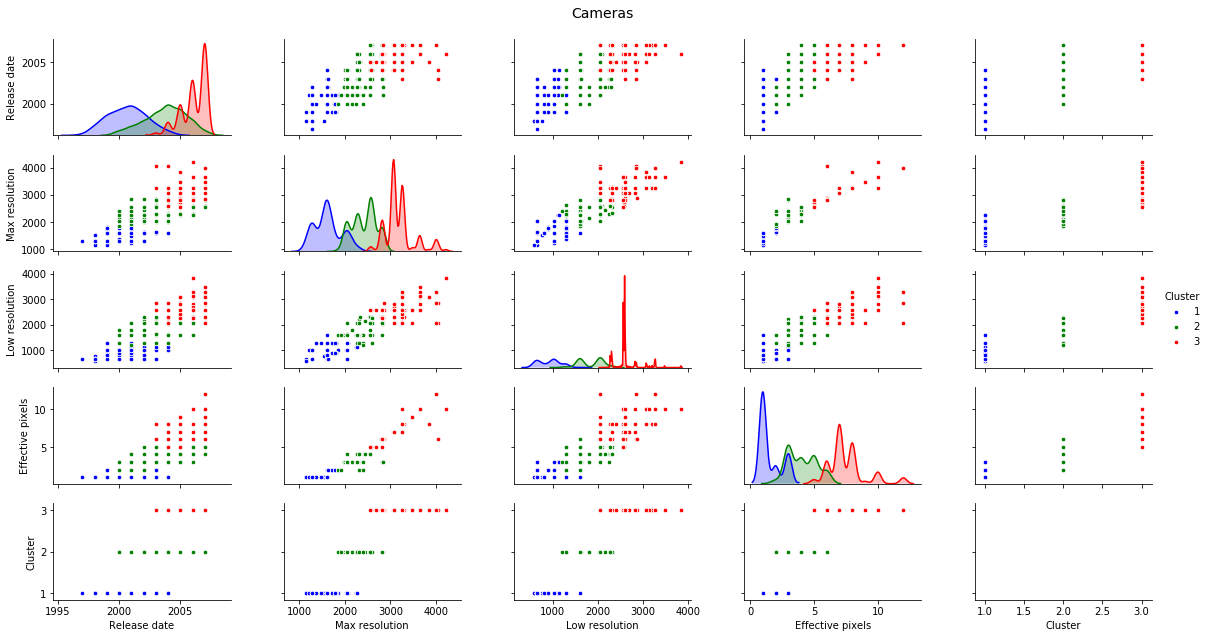

In [221]:
pp = sns.pairplot(df, size=1.8, aspect=1.8, hue="Cluster", palette=["b","g","r"],
                  plot_kws=dict(s=20),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Cameras', fontsize=14)

## Iterasi Selesai
Iterasi untuk perhitungan 4 fitur cukup sampai iterasi ke-6 karena pada bagian "Penghitungan delta dan pengecekan threshold", hasil dari nilai delta yaitu 0.0 lebih kecil daripada nilai threshold yaitu 5000.

# Kesimpulan
Berdasarkan hasil dari clustering 1000 dataset kamera yang telah dilakukan menggunakan metode K-Means dan telah dikelompokkan berdasarkan spesifikasi yang mirip dengan menggunakan 2 contoh kasus, yaitu kasus pertama dengan menggunakan 12 fitur dan kasus kedua menggunakan 4 fitur, didapatkan kesimpulan bahwa:

Terdapat pengaruh terhadap pengurangan fitur yang digunakan untuk clustering menggunakan metode K-Means. Yaitu :
1. Semakin banyak fitur yang digunakan, maka jumlah iterasi yang dilakukan akan semakin banyak jika penentuan berlanjutnya pada iterasi berdasarkan perbandingan pengurangan fungsi objektif baru dan lama dengan menggunakan threshold, karena selisih dari nilai delta pada iterasi setelah dan iterasi sebelumnya semakin besar.
3. Perbedaan jumlah fitur mempengaruhi hasil akhir cluster nya.

## Pada kesimpulan nomor 1, hal ini bisa dibuktikan melalui:
Nilai delta jika menggunakan 12 fitur :
- Iterasi 1 : 2209930.057572
- Iterasi 2 : 544739.3637038665
- Iterasi 3 : 52940.27142219897
- Iterasi 4 : 3060.776570085436

Nilai delta jika menggunakan 4 fitur : 
- Iterasi 1 : 1931675.4677178203
- Iterasi 2 : 420224.7516118833
- Iterasi 3 : 94011.95099288318
- ----- nilai delta naik -----
- Iterasi 4 : 193391.77839802857
- Iterasi 5 : 10767.56262573367
- Iterasi 6 : 0.0

## Pada kesimpulan nomor 3, hal ini bisa dibuktikan melalui:
Hasil cluster jika menggunakan 12 fitur :
#### Iterasi 1 :
- Cluster 1 : [285 rows x 12 columns]
- Cluster 2 : [261 rows x 12 columns]
- Cluster 3 : [259 rows x 12 columns]
#### Iterasi 2 :
- Cluster 1 : [210 rows x 12 columns]
- Cluster 2 : [234 rows x 12 columns]
- Cluster 3 : [361 rows x 12 columns]
#### Iterasi 3 :
- Cluster 1 : [200 rows x 12 columns]
- Cluster 2 : [235 rows x 12 columns]
- Cluster 3 : [370 rows x 12 columns]
#### Iterasi 4 :
- Cluster 1 :  [209 rows x 12 columns]
- Cluster 2 : [262 rows x 12 columns]
- Cluster 3 : [334 rows x 12 columns]

Hasil cluster jika menggunakan 4 fitur :
#### Iterasi 1 :
- Cluster 1 : [285 rows x 4 columns]
- Cluster 2 : [261 rows x 4 columns]
- Cluster 3 : [259 rows x 4 columns]
#### Iterasi 2 :
- Cluster 1 : [364 rows x 4 columns]
- Cluster 2 : [422 rows x 4 columns]
#### Iterasi 3 :
- Cluster 1 : [269 rows x 4 columns]
- Cluster 2 : [199 rows x 4 columns]
- Cluster 3 : [337 rows x 4 columns]
#### Iterasi 4 :
- Cluster 1 : [201 rows x 4 columns]
- Cluster 2 : [352 rows x 4 columns]
- Cluster 3 : [252 rows x 4 columns]
#### Iterasi 5 : 
- Cluster 1 : [196 rows x 4 columns]
- Cluster 2 : [357 rows x 4 columns]
- Cluster 3 : [252 rows x 4 columns]
#### Iterasi 6 :
- Cluster 1 : [196 rows x 4 columns]
- Cluster 2 : [357 rows x 4 columns]
- Cluster 3 : [252 rows x 4 columns]